# Data in Motion Travel Analytics Project

## Project Overview

Yegon Travel Analytics is a consulting firm focused on delivering data-driven insights to tourism companies. A leading tourism company has approached us to leverage their customer data to enhance their understanding of their customer base, optimize marketing strategies, and improve product offerings.

### Problem Understanding

The tourism industry is highly competitive, with companies continually seeking to tailor their offerings to meet the diverse needs of their customers. Understanding customer preferences, demographics, buying behaviors, and interactions with sales teams is crucial for designing effective marketing strategies and product offerings. 

### Problem Statement

Despite having a vast customer base, the client lacks deep insights into their customers' preferences and behaviors. This gap in understanding impedes the company's ability to:

- Tailor marketing and sales strategies effectively.
- Design products that meet the diverse needs of their customers.
- Optimize customer outreach and engagement.

### Objective

The primary objective of this project is to analyze the provided customer data to:

1. Gain insights into the customer base.
2. Optimize marketing and sales strategies based on data-driven insights.
3. Improve product offerings by understanding customer needs and preferences.

### Hypothesis

We hypothesize that by analyzing customer demographics, preferences, interactions with the sales team, and buying behaviors, we can identify key factors that influence customer decisions. These insights will enable the tourism company to:

- Segment their customer base more effectively.
- Design targeted marketing campaigns.
- Develop tailored product offerings that resonate with different customer segments.

### Data Overview

The dataset provided by the tourism company includes:

- Customer demographics (age, gender, income level, etc.)
- Preferences (type of tourism products preferred)
- Interactions with the company's sales team
- Buying behaviors (frequency of purchases, type of products bought, etc.)

### Methodology

1. **Data Cleaning and Preprocessing**: Prepare the data for analysis by cleaning and structuring it.
2. **Exploratory Data Analysis (EDA)**: Conduct an initial analysis to understand the data's characteristics.
3. **Customer Segmentation**: Use clustering techniques to segment the customer base.
4. **Predictive Modeling**: Develop models to predict customer preferences and buying behaviors.
5. **Insight Generation**: Derive insights from the analysis to inform marketing and product development strategies.

### Tools and Technologies

- **Python**: A versatile programming language favored for data science projects. We will utilize several Python libraries, including:
  - **NumPy**: Essential for numerical operations.
  - **Pandas**: Key for data manipulation and analysis, offering data structures and operations for manipulating numerical tables and time series.
  - **Matplotlib** and **Seaborn**: These libraries are used for data visualization, providing a wide range of static, animated, and interactive plots.
  - **Scikit-learn**: Offers a wide range of algorithms for machine learning and statistical modeling, including regression, classification, clustering, and dimensionality reduction.
  - **XGBoost**: A highly efficient and flexible gradient boosting library that provides a powerful framework for building predictive models.
  - **Polars**: A fast DataFrames library for high performance data manipulation and analysis, useful for handling large datasets efficiently.
  - **Statsmodels**: Useful for conducting statistical tests and exploring data relationships through linear models.
  - **SciPy**: Provides additional functionality for scientific computing, such as optimization, integration, interpolation, eigenvalue problems, algebraic equations, and others.




# **Importing Required Libraries**

In [1]:
# Importing data analysis libraries
import numpy as np
import pandas as pd

# Importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Importing high performance data manipulation library
import polars as pl

# Importing statistical modeling library
import statsmodels.api as sm

# Importing scientific computing library
from scipy import stats

# Additional setup for data visualization
sns.set_theme(style="darkgrid")  # Setting the theme for seaborn plots

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')



# **Importing dataset**

In [2]:
# Specifying the path to our datafiule- remember it is an excel file 
excel_file_path = 'Tourism.xlsx'

# Specify the sheet name 
sheet_name = 'Tourism'  
# Read the specified sheet into a pandas DataFrame
tourism= pd.read_excel(excel_file_path, sheet_name=sheet_name, engine='openpyxl')

# sampling tourism to understand
(tourism
.sample(5))


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
265,200265,0,29.0,Self Enquiry,3,8.0,Small Business,Male,3,4.0,Deluxe,4.0,Divorced,3.0,0,4,0,1.0,Manager,21644.0
3039,203039,1,59.0,Self Enquiry,1,9.0,Salaried,Male,3,4.0,King,4.0,Single,NaN,1,3,1,2.0,VP,37924.0
488,200488,0,NaN,Self Enquiry,1,8.0,Salaried,Female,2,3.0,Deluxe,3.0,Divorced,2.0,0,2,1,0.0,Manager,NaN
4163,204163,0,46.0,Company Invited,1,14.0,Salaried,Male,4,2.0,Deluxe,3.0,Married,6.0,0,1,1,1.0,Manager,25112.0
2349,202349,0,60.0,Self Enquiry,3,13.0,Small Business,Male,2,1.0,Deluxe,3.0,Married,1.0,1,5,0,0.0,Manager,20220.0



# Tourism Dataset Variables

| Variable                 | Description                                                                                   |
|--------------------------:|-----------------------------------------------------------------------------------------------:|
| `CustomerID`             | Unique customer ID                                                                            |
| `ProdTaken`              | Whether the customer has purchased a package or not (0: No, 1: Yes)                           |
| `Age`                    | Age of customer                                                                               |
| `TypeofContact`          | How customer was contacted (Company Invited or Self Inquiry)                                  |
| `CityTier`               | City tier depends on the development of a city, population, facilities, and living standards. Categories are ordered i.e., Tier 1 > Tier 2 > Tier 3 |
| `DurationOfPitch`        | Duration of the pitch by a salesperson to the customer                                        |
| `Occupation`             | Occupation of customer                                                                        |
| `Gender`                 | Gender of customer                                                                            |
| `NumberOfPersonVisiting` | Total number of persons planning to take the trip with the customer                           |
| `NumberOfFollowups`      | Total number of follow-ups done by the salesperson after the sales pitch                      |
| `ProductPitched`         | Product pitched by the salesperson                                                            |
| `PreferredPropertyStar`  | Preferred hotel property rating by the customer                                               |
| `MaritalStatus`          | Marital status of the customer                                                                |
| `NumberOfTrips`          | Average number of trips in a year by the customer                                             |
| `Passport`               | The customer has a passport or not (0: No, 1: Yes)                                            |
| `PitchSatisfactionScore` | Sales pitch satisfaction score                                                                |
| `OwnCar`                 | Whether the customers own a car or not (0: No, 1: Yes)                                        |
| `NumberOfChildrenVisiting`| Total number of children with age less than 5 planning to take the trip with the customer    |
| `Designation`            | Designation of the customer in the current organization                                       |
| `MonthlyIncome`          | Gross monthly income of the customer                                                          |


# **Data Explortaion**

In [3]:
# Getting information regarding our dataset
(tourism
.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [4]:
## Checking missing values
(tourism
 .isna().mean()
 .mul(100) # getting proportion of misisng values
 .sort_values(ascending=False)) # sorting missing valiues in descenidng mannner

DurationOfPitch             5.135025
MonthlyIncome               4.766776
Age                         4.623568
NumberOfTrips               2.864157
NumberOfChildrenVisiting    1.350245
NumberOfFollowups           0.920622
PreferredPropertyStar       0.531915
TypeofContact               0.511457
Designation                 0.000000
OwnCar                      0.000000
PitchSatisfactionScore      0.000000
Passport                    0.000000
CustomerID                  0.000000
MaritalStatus               0.000000
ProdTaken                   0.000000
NumberOfPersonVisiting      0.000000
Gender                      0.000000
Occupation                  0.000000
CityTier                    0.000000
ProductPitched              0.000000
dtype: float64

In [5]:
# Define a function to plot the missing values
def plot_missing_values(series):
    """
    Plots the missing values percentage for each column in a pandas Series.
    Assumes the series contains the percentage of missing values for each column.
    """
    plt.figure(figsize=(10, 6))  # Set the figure size for better readability
    series.plot(kind='bar', color='skyblue')  # Create a bar plot
    plt.ylabel('Percentage of Missing Values')  # Set y-axis label
    plt.xlabel('Columns')  # Set x-axis label
    plt.xticks(rotation=90)  # Rotate column names for better readability
    plt.title('Missing Values in Dataset')  # Set the title of the plot
    plt.show()

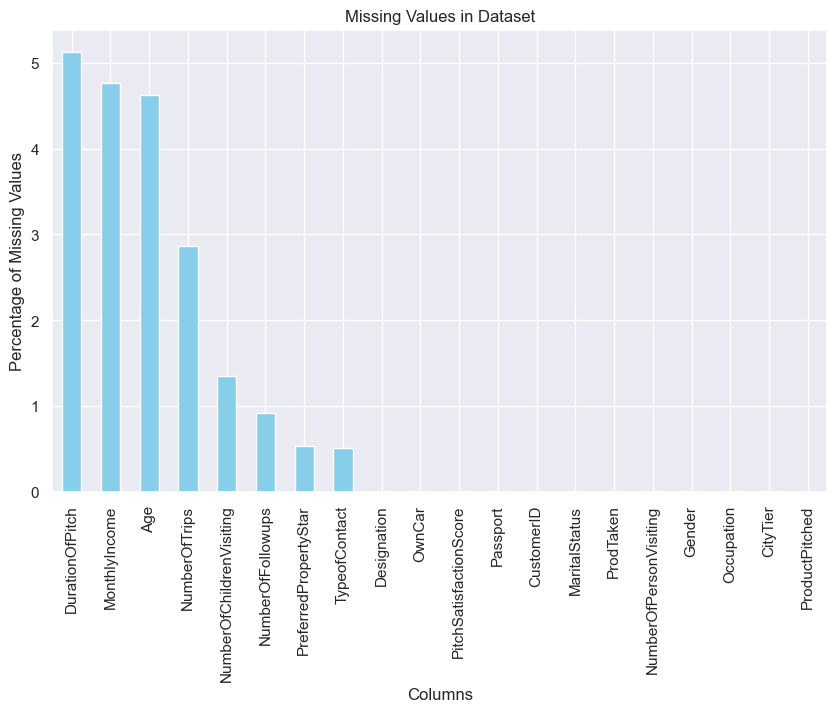

In [6]:
(tourism
 .isna().mean()
 .mul(100)  # Getting proportion of missing values
 .sort_values(ascending=False)  # Sorting missing values in descending manner
 .pipe(plot_missing_values)  # Use the plotting function on the resulting Series
)

**Features with Missing Values**
`Age`,`TypeofContact`,`DurationOfPitch`,`NumberOfFollowups`,`PreferredPropertyStar`,`NumberOfTrips`,`NumberOfChildrenVisiting` and `MonthlyIncome` have missing values 

In [7]:
def impute_missing_data(df):
    return (df
            # Impute numerical columns with median
            .assign(Age=lambda x: x['Age'].fillna(x['Age'].median()),
                    DurationOfPitch=lambda x: x['DurationOfPitch'].fillna(x['DurationOfPitch'].median()),
                    NumberOfFollowups=lambda x: x['NumberOfFollowups'].fillna(x['NumberOfFollowups'].mean()),
                    PreferredPropertyStar=lambda x: x['PreferredPropertyStar'].fillna(x['PreferredPropertyStar'].median()),
                    NumberOfTrips=lambda x: x['NumberOfTrips'].fillna(x['NumberOfTrips'].median()),
                    NumberOfChildrenVisiting=lambda x: x['NumberOfChildrenVisiting'].fillna(x['NumberOfChildrenVisiting'].median()),
                    MonthlyIncome=lambda x: x['MonthlyIncome'].fillna(x['MonthlyIncome'].median()))
            # Impute categorical column with mode
            .apply(lambda x: x.fillna(x.mode().iloc[0]) if x.dtype == 'object' else x)
           )

# Apply the function to your DataFrame
tourism_imputed = impute_missing_data(tourism)



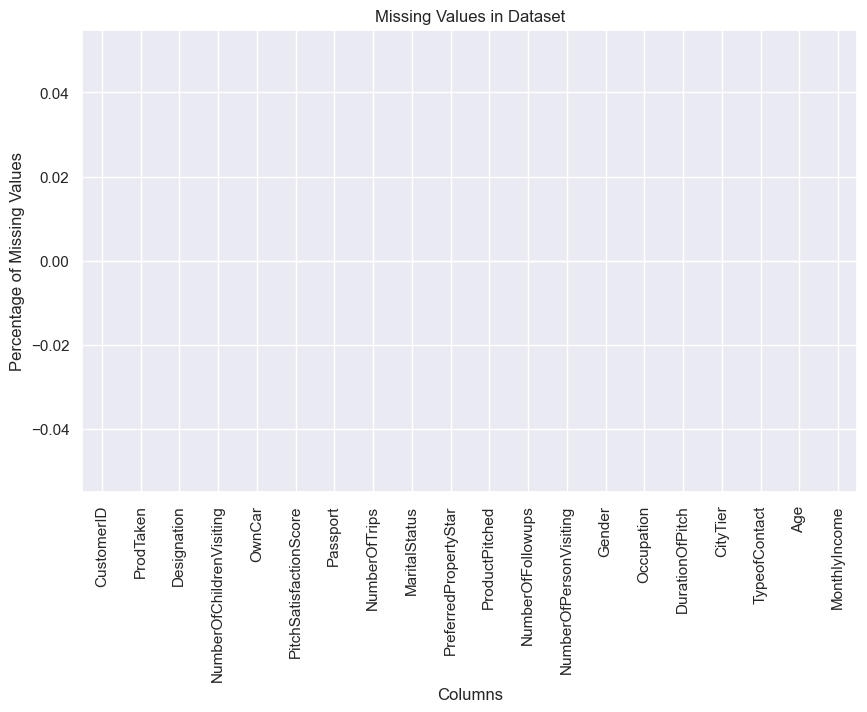

In [8]:
(tourism_imputed
 .isna().mean()
 .mul(100)  # Getting proportion of missing values
 .sort_values(ascending=False)  # Sorting missing values in descending manner
 .pipe(plot_missing_values)  # Use the plotting function on the resulting Series
)

In [9]:
(tourism_imputed
.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

In [10]:
def convert_objects_to_categorical(df):
    """
    Converts all columns of type 'object' to 'categorical' using pandas chaining methodology.

    Parameters:
    df (pd.DataFrame): The DataFrame on which to perform the conversions.

    Returns:
    pd.DataFrame: A new DataFrame with 'object' columns converted to 'categorical'.
    """
    # Select object columns
    object_columns = df.select_dtypes(include=['object']).columns.tolist()

    # Convert each object column to categorical using the 'astype' method in a chain
    for col in object_columns:
        df[col] = df[col].astype('category')

    return df

tourism_converted = convert_objects_to_categorical(tourism_imputed)


In [11]:
(tourism_converted
.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4888 non-null   float64 
 3   TypeofContact             4888 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4888 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4888 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4888 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4888 non-null   float6

In [12]:
(tourism_converted
.sample(5))

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
161,200161,0,27.0,Company Invited,1,15.0,Small Business,Male,2,3.0,Basic,4.0,Married,7.0,0,3,0,0.0,Executive,17024.0
3405,203405,0,36.0,Company Invited,1,11.0,Salaried,Male,3,4.0,Deluxe,3.0,Unmarried,3.0,1,1,1,2.0,Manager,22927.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
1074,201074,0,33.0,Self Enquiry,1,14.0,Salaried,Male,3,3.0,Deluxe,3.0,Unmarried,3.0,1,3,0,2.0,Manager,21388.0
3395,203395,0,42.0,Company Invited,3,17.0,Small Business,Male,3,6.0,Deluxe,4.0,Unmarried,3.0,0,1,1,1.0,Manager,24829.0


In [13]:


def visualize_categorical_features(df):
    """
    Visualizes all categorical features in the DataFrame using bar plots.

    Parameters:
    df (pd.DataFrame): The DataFrame with categorical features to visualize.
    """
    # Select categorical columns
    categorical_columns = df.select_dtypes(include=['category', 'object']).columns.tolist()
    
    # Determine the number of rows needed for subplots
    num_plots = len(categorical_columns)
    num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Arrange plots in a 3-column format
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 4))
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    # Generate a bar plot for each categorical column
    for i, col in enumerate(categorical_columns):
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=90)
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    # Adjust layout for better fit and display the plot
    plt.tight_layout()
    plt.show()



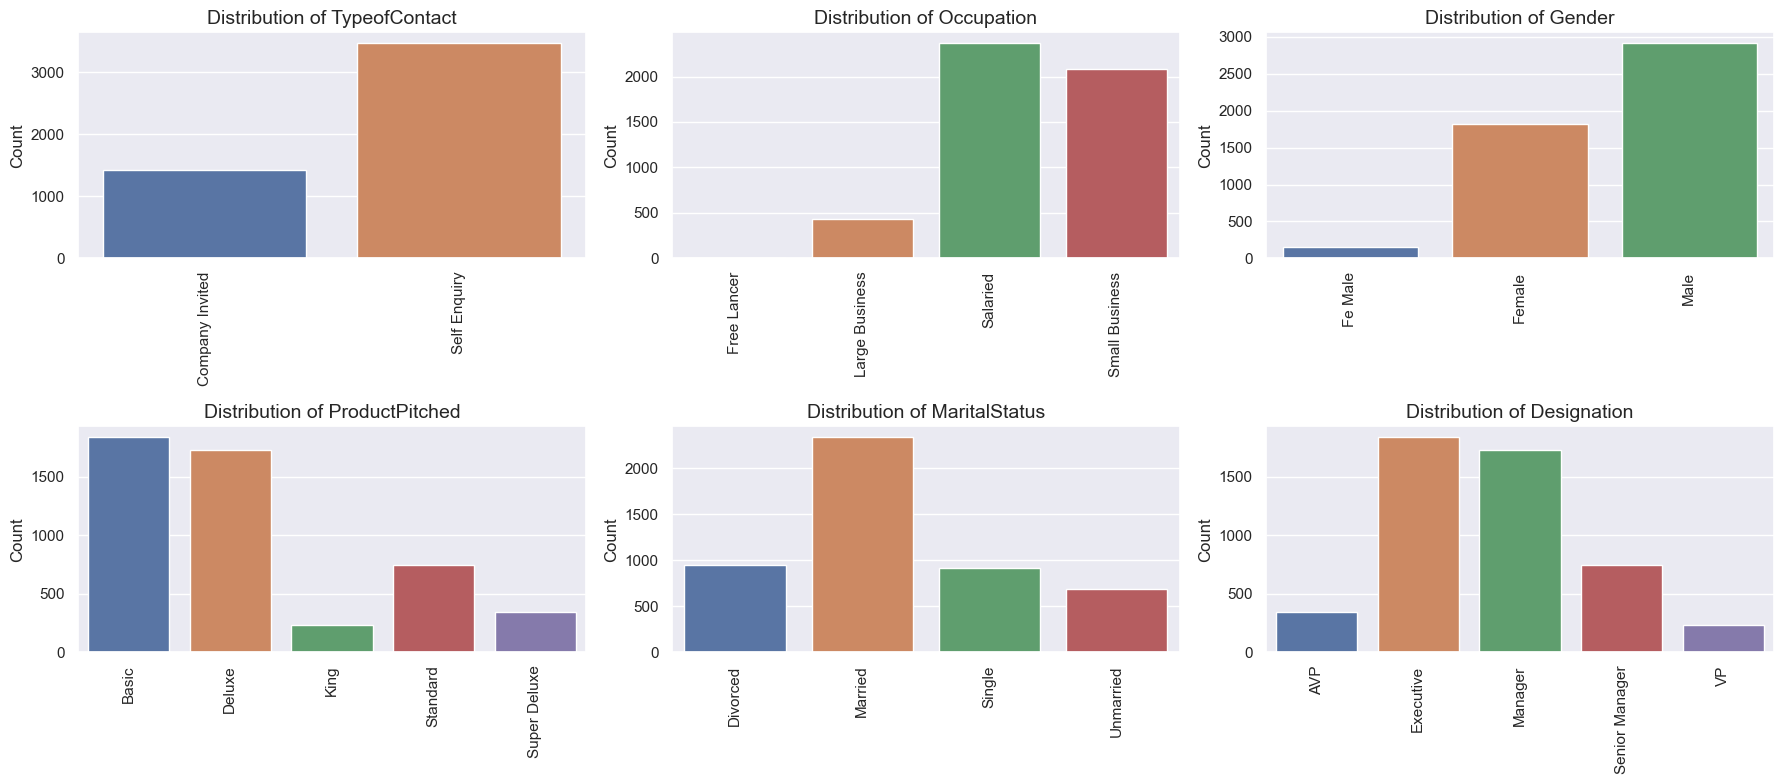

In [14]:
visualize_categorical_features(tourism_converted)


In [15]:
(tourism_converted
 .Gender
 .value_counts()
)

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [16]:
(tourism_converted
 .ProductPitched
 .value_counts()
)

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [17]:
# We noted that Gender and Marital Status needs some cleaning 
(tourism_converted
 .MaritalStatus
 .value_counts()
)

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [18]:
# Lets recode the data in tourism_converetd and create a new data frame tourism_cleaned
tourism_cleaned =(tourism_converted
.assign(Gender=lambda x: x['Gender'].replace({'Fe Male': 'Female'}), 
        MaritalStatus=lambda x: x['MaritalStatus'].replace({'Unmarried': 'Single'}))
           )

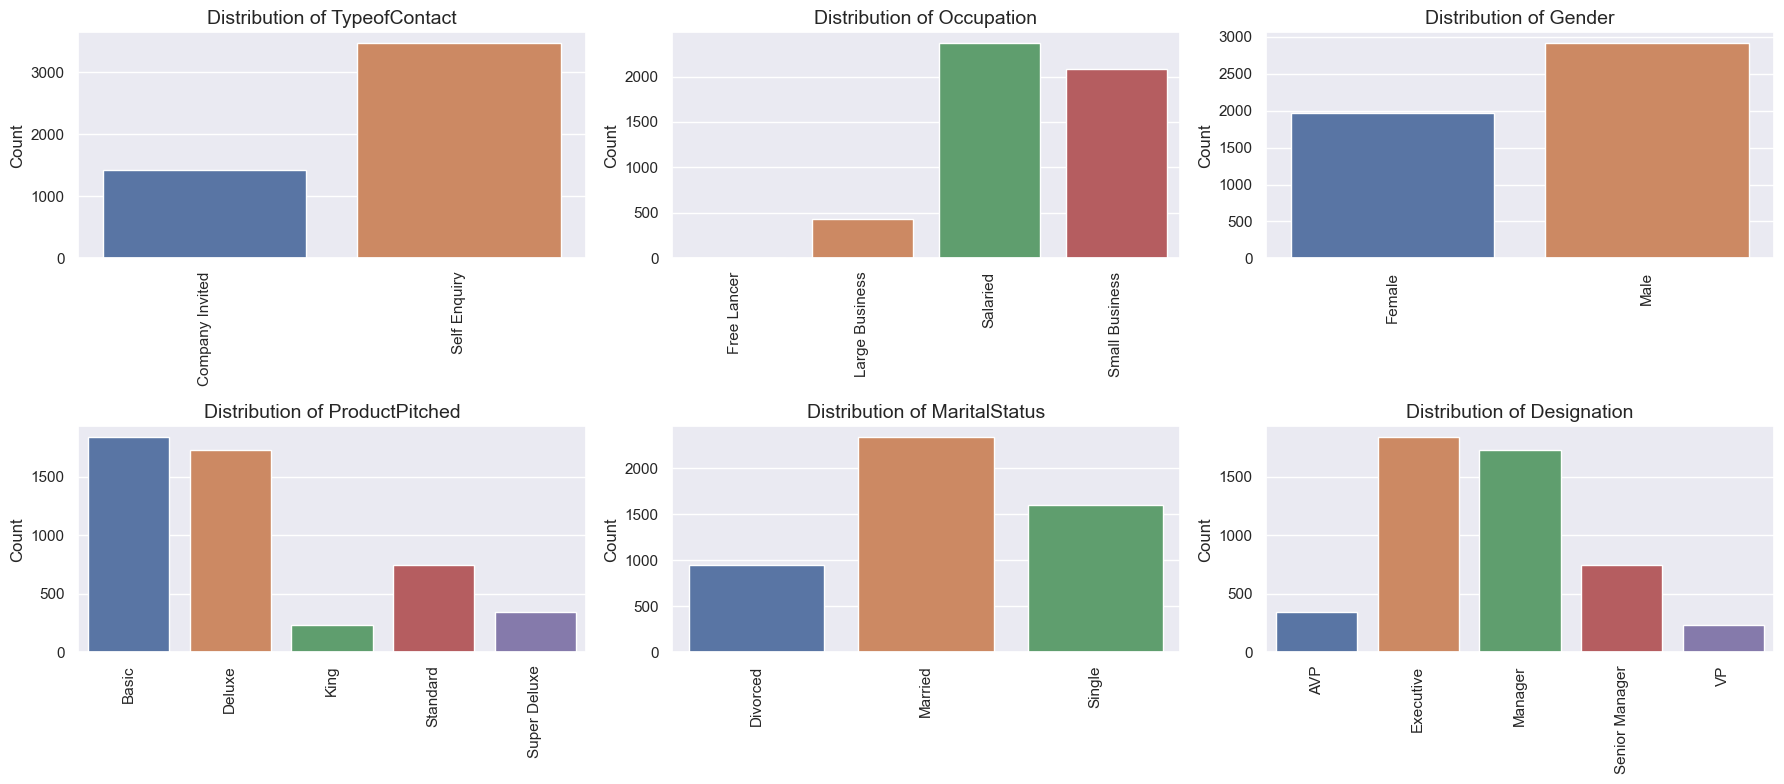

In [19]:
visualize_categorical_features(tourism_cleaned)

# **How is the age distribution of our customers?**
Relevance: Understanding the age distribution helps in tailoring product offerings more effectively.

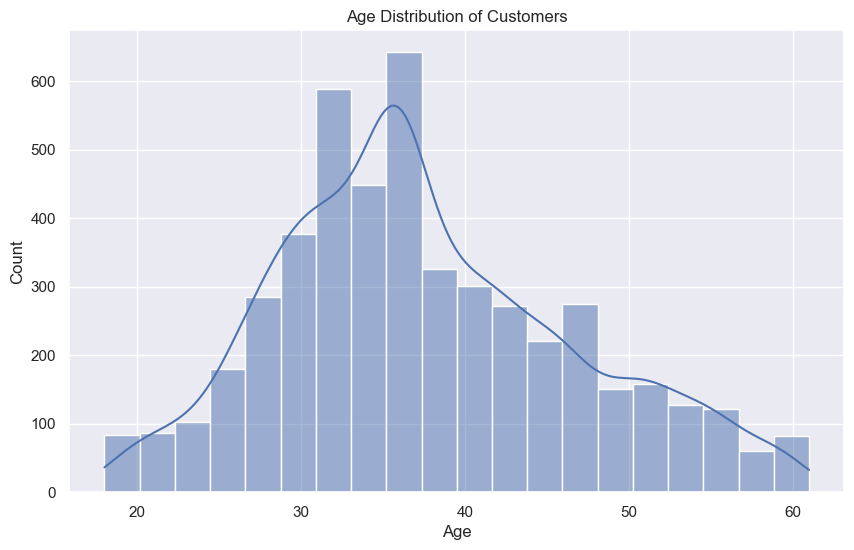

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(tourism_cleaned['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


## **What is the correlation between Monthly Income and Number of Trips made?**
Relevance: This can provide insights into whether income level affects the frequency of travel.

Correlation between Monthly Income and Number of Trips: 0.115210063665901


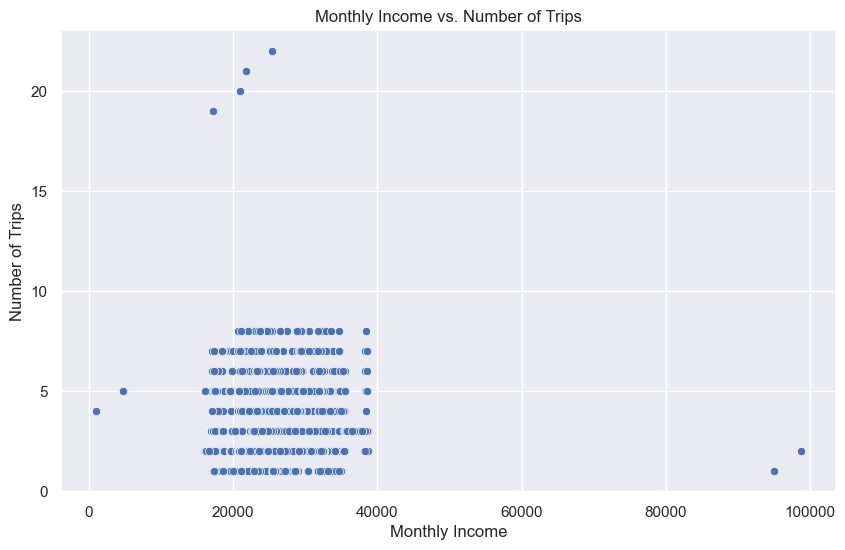

In [21]:
correlation = tourism_cleaned[['MonthlyIncome', 'NumberOfTrips']].corr().iloc[0, 1]
print(f"Correlation between Monthly Income and Number of Trips: {correlation}")

# To visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyIncome', y='NumberOfTrips', data=tourism_cleaned)
plt.title('Monthly Income vs. Number of Trips')
plt.xlabel('Monthly Income')
plt.ylabel('Number of Trips')
plt.show()


The scatter plot and the calculated correlation coefficient provide insights into the relationship between `Monthly Income` and `Number of Trips`.

With a correlation coefficient of `0.115210063665901`, there is a positive but very weak correlation between `Monthly Income` and `Number of Trips`. This implies that as monthly income increases, the number of trips made tends to increase slightly. However, the strength of this association is quite low, suggesting that other factors may be more influential in determining the frequency of trips than income alone.

### Interpretation of the Scatter Plot:
The scatter plot shows that most data points are clustered around the lower to mid-range monthly incomes, with the number of trips generally ranging between 1 to 10. A few outliers with higher monthly incomes do not display a clear trend that would indicate a substantial increase in the number of trips with higher income.

### Relevance:
Contrary to the expectation that higher income individuals might travel more frequently, the data does not strongly support this assumption. Factors such as the purpose of travel (business or leisure), individual constraints (like time availability), and personal preferences might play more significant roles in determining travel frequency. Additionally, it seems that beyond a certain income level, the frequency of trips does not increase proportionately with further increments in income.

This analysis suggests that in marketing travel products or services, income should be considered alongside various other factors. Relying solely on income for targeting may not yield the most effective results without a comprehensive understanding of potential customers' travel habits and preferences. To develop a more targeted customer engagement strategy, it would be beneficial to explore other demographic and psychographic factors that could impact the frequency of travel.


# **Which occupation type tends to have the highest pitch satisfaction scores?**
Relevance: Knowing this can help in customizing pitches for different occupational groups.

Occupation with the highest pitch satisfaction score: Large Business, Score: 3.248847926267281


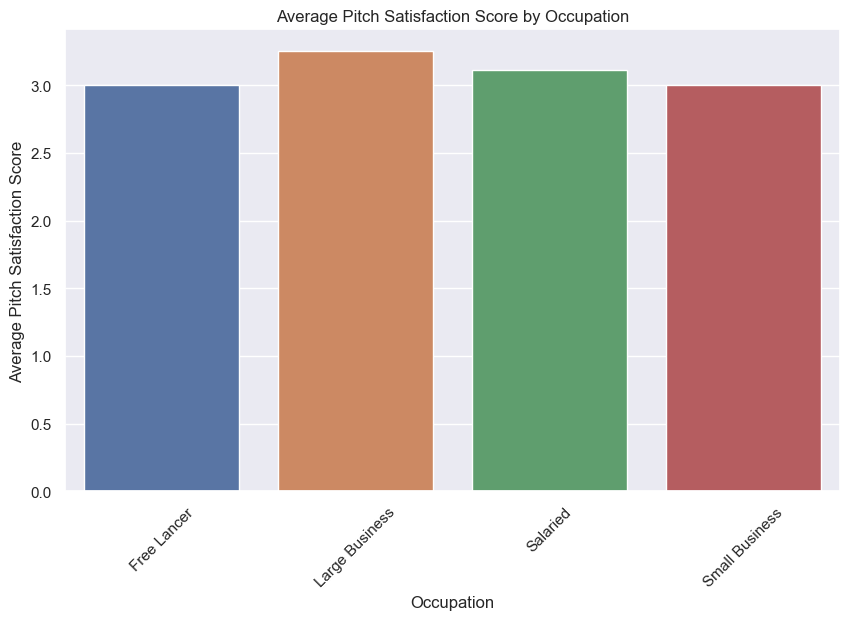

In [22]:
# Grouping by 'Occupation' and calculating the mean 'PitchSatisfactionScore'
occupation_grouped = tourism_cleaned.groupby('Occupation')['PitchSatisfactionScore'].mean().reset_index()

# Identifying the occupation with the highest average score
highest_satisfaction_occupation = occupation_grouped.loc[occupation_grouped['PitchSatisfactionScore'].idxmax()]

print(f"Occupation with the highest pitch satisfaction score: {highest_satisfaction_occupation['Occupation']}, Score: {highest_satisfaction_occupation['PitchSatisfactionScore']}")

# To visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation', y='PitchSatisfactionScore', data=occupation_grouped.sort_values(by='PitchSatisfactionScore', ascending=False))
plt.title('Average Pitch Satisfaction Score by Occupation')
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Average Pitch Satisfaction Score')
plt.show()


The bar chart and analysis indicate that among different occupations, **Large Business** professionals have the highest average pitch satisfaction scores, with a mean score of about **3.25**.

### Findings Interpretation:
The data suggests that sales pitches are most likely tailored or resonate better with individuals from the 'Large Business' sector. This group reports the highest satisfaction, indicating a successful alignment between the sales pitches and their expectations or experiences.

### Relevance and Strategic Implications:
- **Customization of Sales Approach**: Tailor sales strategies to different occupational groups, recognizing that what works for 'Large Business' may not be as effective for others.
- **Training and Development**: Guide training for sales teams to emphasize elements that have been successful with high-satisfaction groups.
- **Resource Allocation**: Focus marketing efforts on groups more likely to respond positively to pitches, potentially increasing conversion rates.

The insight that 'Large Business' professionals are the most satisfied group presents an opportunity to enhance pitch satisfaction for other occupational categories by learning from and adapting the successful elements of pitches targeted at 'Large Business'.


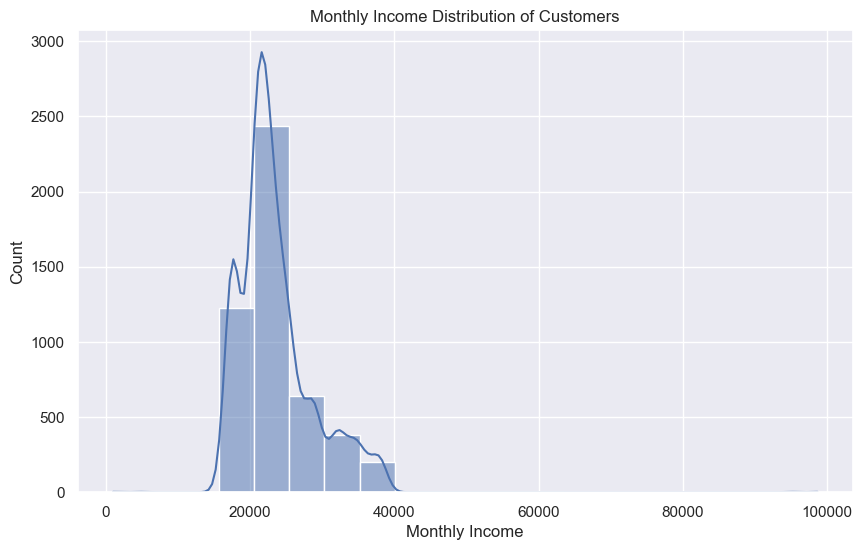

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(tourism_cleaned['MonthlyIncome'], bins=20, kde=True)
plt.title('Monthly Income Distribution of Customers')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()


## *Data Pre-processing**

In [24]:
# One hot encoding 
from sklearn.preprocessing import OneHotEncoder
# Then, we select the categorical columns to encode
categorical_columns = tourism_cleaned.select_dtypes(include=['category', 'object']).columns.tolist()

# Apply one-hot encoding to the categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(tourism_cleaned[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from the DataFrame and concatenate with the encoded DataFrame
tourism_cleaned_encoded = pd.concat([tourism_cleaned.drop(columns=categorical_columns).reset_index(drop=True),
                             encoded_df.reset_index(drop=True)], axis=1)





In [25]:
# Display  a sampled 0f rows of the encoded DataFrame

(tourism_cleaned_encoded
 .sample(6)
)

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
4514,204514,0,33.0,1,11.0,4,5.0,3.0,3.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2889,202889,0,56.0,3,25.0,3,4.0,4.0,5.0,0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
422,200422,1,19.0,2,8.0,2,4.0,3.0,2.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4684,204684,0,47.0,1,7.0,3,4.0,3.0,2.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
894,200894,0,54.0,1,9.0,2,3.0,3.0,4.0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4527,204527,0,35.0,2,10.0,3,4.0,3.0,2.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
# Define the columns to scale
columns_to_scale = ['NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
                    'NumberOfChildrenVisiting', 'MonthlyIncome', 'Age', 'CityTier',
                    'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups',
                    'PreferredPropertyStar']

# Create a ColumnTransformer that scales only the specified columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale)
    ],
    remainder='passthrough'  # Leave other columns untouched
)

# Apply the transformations
tourism_processed = pd.DataFrame(preprocessor.fit_transform(tourism_cleaned_encoded),
                                 columns=columns_to_scale + [col for col in tourism_cleaned_encoded.columns if col not in columns_to_scale])

# Ensure the original order of columns is preserved
tourism_processed_classification = tourism_processed[tourism_cleaned_encoded.columns]




In [27]:
# Display the first few rows of the processed DataFrame
(tourism_processed_classification
 .head())

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,200000.0,1.0,0.379261,1.468369,-1.125986,0.130966,-0.710021,-0.725222,-1.223399,1.561221,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,200001.0,0.0,1.258009,-0.713871,-0.163906,0.130966,0.292203,0.529604,-0.674727,-0.640524,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,200002.0,1.0,-0.060113,-0.713871,-0.885466,0.130966,0.292203,-0.725222,2.068633,1.561221,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,200003.0,0.0,-0.499487,-0.713871,-0.765206,-1.248694,-0.710021,-0.725222,-0.674727,1.561221,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,200004.0,0.0,-0.169956,-0.713871,-0.885466,-1.248694,-0.710021,0.529604,-1.223399,-0.640524,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# **Modelling** 

# Modeling Customer Product Uptake with Decision Trees

We will construct a predictive model to understand the factors influencing customers' decisions to purchase a product after a sales pitch. This model aims to predict the binary outcome `ProdTaken`, which signifies whether a product was purchased (`1`) or not (`0`). We will compare SVM, Neural Networks and later use random Forest, Xgboost  and deep learning models to compare the best models 

## Data Preparation

- The dataset, `tourism_processed_classification`, contains various features representing customer demographics and their responses to marketing pitches.
- The `CustomerID` column is excluded from the predictive features as it is a unique identifier that does not contribute to the decision-making process.
- The `ProdTaken` column is used as the target variable `y`.


## Model Evaluation

- The model's performance will be evaluated using the following metrics:
  - **Accuracy:** Proportion of total number of predictions that were correct.
  - **Precision:** Proportion of positive identifications that were actually correct.
  - **Recall:** Proportion of actual positives that were identified correctly.
  - **F1 Score:** Harmonic mean of Precision and Recall, providing a balance between them.

By analyzing these metrics, we can compare these models and idnetify th best model that performs better  in predicting whether customers will purchase a product after a sales pitch.


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Our data frame is tourism_processed_classification  and 'ProdTaken' is the target variable
X = tourism_processed_classification.drop(['ProdTaken','CustomerID'], axis=1)# We also drop 'CustomerID'
y = tourism_processed_classification['ProdTaken']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## **Decision Tree**

In [29]:
# Training a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Part B: Evaluate the performance of the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"Decision Tree - Accuracy: {accuracy_dt}, Precision: {precision_dt}, Recall: {recall_dt}, F1 Score: {f1_dt}")


Decision Tree - Accuracy: 0.9120654396728016, Precision: 0.774869109947644, Recall: 0.774869109947644, F1 Score: 0.774869109947644


## **SVM**

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Training an SVM classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the performance of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='binary')
recall_svm = recall_score(y_test, y_pred_svm, average='binary')
f1_svm = f1_score(y_test, y_pred_svm, average='binary')

print(f"SVM - Accuracy: {accuracy_svm}, Precision: {precision_svm}, Recall: {recall_svm}, F1 Score: {f1_svm}")


SVM - Accuracy: 0.8650306748466258, Precision: 0.8470588235294118, Recall: 0.3769633507853403, F1 Score: 0.5217391304347826


## **Neural Network**

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Training a Neural Network classifier
nn_classifier = MLPClassifier(random_state=42, max_iter=300)
nn_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_nn = nn_classifier.predict(X_test)

# Evaluate the performance of the Neural Network model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn, average='binary')
recall_nn = recall_score(y_test, y_pred_nn, average='binary')
f1_nn = f1_score(y_test, y_pred_nn, average='binary')

print(f"Neural Network - Accuracy: {accuracy_nn}, Precision: {precision_nn}, Recall: {recall_nn}, F1 Score: {f1_nn}")


Neural Network - Accuracy: 0.9478527607361963, Precision: 0.9320987654320988, Recall: 0.7905759162303665, F1 Score: 0.8555240793201134


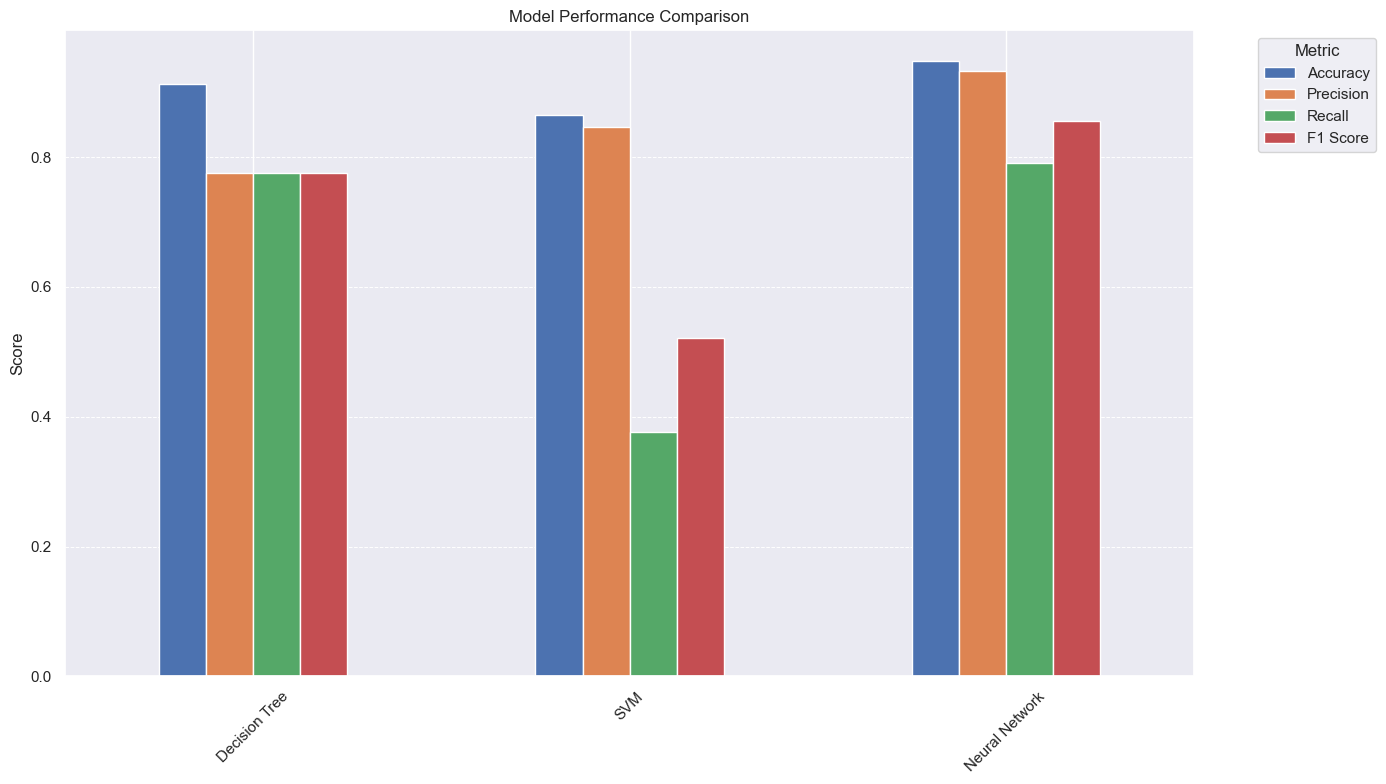

In [32]:

# Updated model performance metrics
model_performance = {
    'Accuracy': {'Decision Tree': 0.9120654396728016, 'SVM': 0.8650306748466258, 'Neural Network': 0.9478527607361963},
    'Precision': {'Decision Tree': 0.774869109947644, 'SVM': 0.8470588235294118, 'Neural Network': 0.9320987654320988},
    'Recall': {'Decision Tree': 0.774869109947644, 'SVM': 0.3769633507853403, 'Neural Network': 0.7905759162303665},
    'F1 Score': {'Decision Tree': 0.774869109947644, 'SVM': 0.5217391304347826, 'Neural Network': 0.8555240793201134}
}

# Create a DataFrame from the model performance dictionary

performance_df = pd.DataFrame(model_performance)

# Plotting
performance_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()


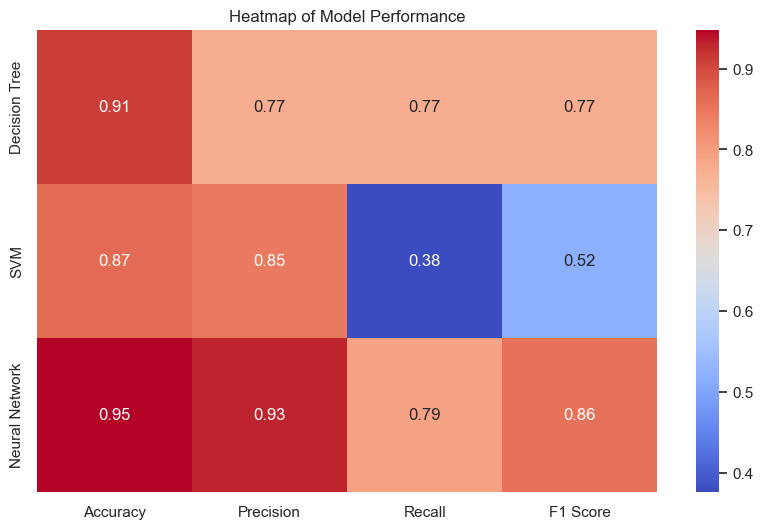

In [33]:
# Lets compare model performances using Heat maps 
plt.figure(figsize=(10, 6))
sns.heatmap(performance_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Model Performance')
plt.show()


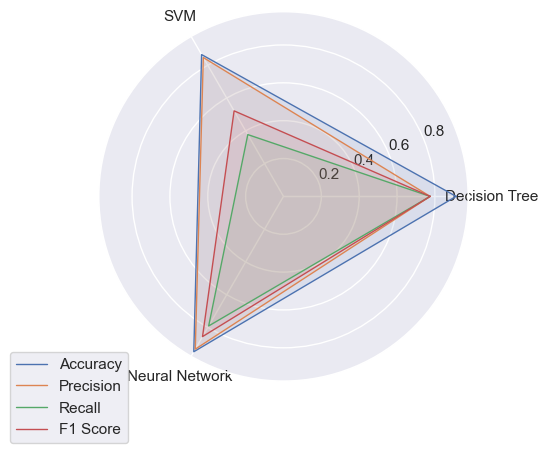

In [34]:
from math import pi

# Number of variables we're plotting.
categories = list(performance_df.index)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the radar plot
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Plot each model's performance
for model in performance_df.columns:
    values = performance_df[model].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=model)

# Fill area
    ax.fill(angles, values, alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


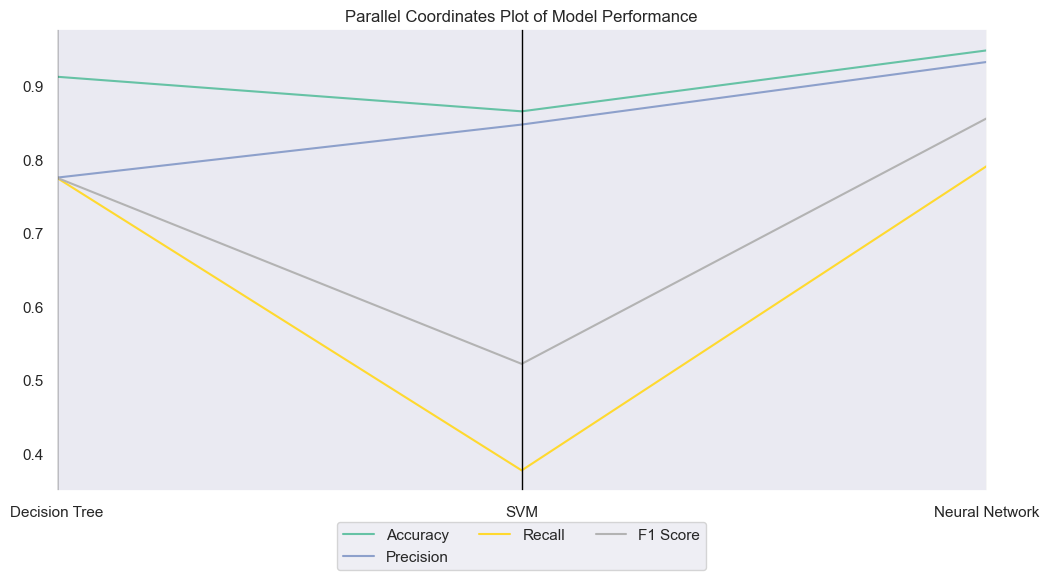

In [35]:
from pandas.plotting import parallel_coordinates

# Add a 'Model' column for parallel_coordinates
performance_df_transposed = performance_df.T.reset_index()
performance_df_transposed.rename(columns={'index': 'Model'}, inplace=True)

plt.figure(figsize=(12, 6))
parallel_coordinates(performance_df_transposed, 'Model', colormap=plt.get_cmap("Set2"))
plt.title('Parallel Coordinates Plot of Model Performance')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.show()


In [36]:
tourism_processed_classification.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome',
       'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry',
       'Occupation_Free Lancer', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Female',
       'Gender_Male', 'ProductPitched_Basic', 'ProductPitched_Deluxe',
       'ProductPitched_King', 'ProductPitched_Standard',
       'ProductPitched_Super Deluxe', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Designation_AVP',
       'Designation_Executive', 'Designation_Manager',
       'Designation_Senior Manager', 'Designation_VP'],
      dtype='object')

These visualizations shows the comparison of model performance across four key metrics: Accuracy, Precision, Recall, and F1 Score for Decision Tree, SVM, and Neural Network models. From the chart, you can observe that:

- The **Neural Network model** has the highest Accuracy and Precision, indicating its superior performance in correctly identifying the positive class and its overall prediction accuracy.
- The **Decision Tree model** shows balanced performance in terms of Precision, Recall, and F1 Score, suggesting it has a good balance between correctly identifying positive cases and minimizing false positives.
- The **SVM model**, while having decent Precision, falls behind in Recall and consequently in the F1 Score, indicating it struggles more with correctly identifying all positive cases.

This visual comparison helps in assessing which model might be the best fit for our specific application, considering the trade-offs between different performance metrics.


# **PART 2**

## **Customer Segmentation Based on Demographics and Travel Preferences**

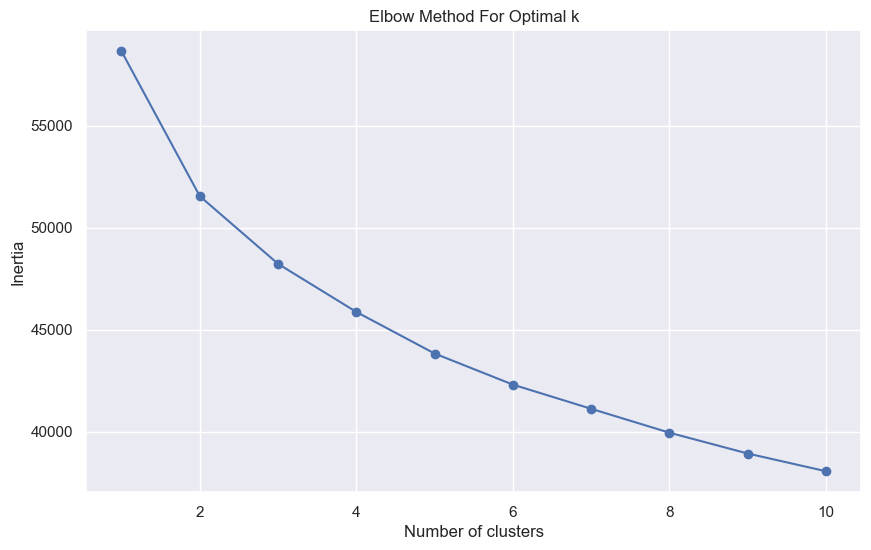

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for segmentation
features_for_segmentation = ['Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome']
X_segmentation = pd.get_dummies(tourism_cleaned[features_for_segmentation], drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_segmentation)

# Use the Elbow method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
# Plot the elbow curve
plt.figure(figsize=(6, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [38]:
# We found the optimal number of clusters to be 'k=4'
kmeans = KMeans(n_clusters=k, random_state=42)
tourism_cleaned['Customer_Segment'] = kmeans.fit_predict(X_scaled)

# Analyze the segments
for i in range(k):
    print(f"\nSegment {i}:")
    segment = tourism_cleaned[tourism_cleaned['Customer_Segment'] == i]
    print(segment.describe())



Segment 0:
          CustomerID   ProdTaken         Age    CityTier  DurationOfPitch  \
count     595.000000  595.000000  595.000000  595.000000       595.000000   
mean   203260.361345    0.379832   35.189916    1.732773        15.284034   
std      1178.000938    0.485753    8.303334    0.948604         6.789896   
min    200026.000000    0.000000   18.000000    1.000000         6.000000   
25%    202662.500000    0.000000   29.000000    1.000000        10.000000   
50%    203394.000000    0.000000   35.000000    1.000000        14.000000   
75%    204200.000000    1.000000   40.000000    3.000000        19.000000   
max    204887.000000    1.000000   59.000000    3.000000        33.000000   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count              595.000000         595.000000             595.000000   
mean                 3.391597           4.224720               3.541176   
std                  0.488518           0.832867               0.7846

          CustomerID   ProdTaken         Age    CityTier  DurationOfPitch  \
count     566.000000  566.000000  566.000000  566.000000       566.000000   
mean   201337.167845    0.335689   37.051237    1.643110        15.508834   
std       856.158234    0.472648    8.855328    0.911974         7.932174   
min    200000.000000    0.000000   18.000000    1.000000         6.000000   
25%    200655.250000    0.000000   31.000000    1.000000         9.000000   
50%    201309.000000    0.000000   36.000000    1.000000        13.000000   
75%    201950.500000    1.000000   42.000000    3.000000        21.000000   
max    204793.000000    1.000000   61.000000    3.000000        35.000000   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count              566.000000         566.000000             566.000000   
mean                 2.303887           3.100119               3.581272   
std                  0.497305           0.877791               0.817682   
min   

## Elbow Method Interpretation
The elbow curve indicates that the optimal number of clusters for customer segmentation is approximately **4**. This is identified by the point on the curve where the inertia's rate of decrease lessens, suggesting that additional clusters beyond this number contribute less to the variance explanation within the data.

## Customer Segmentation Results
The segmentation analysis reveals distinct customer groups, each with unique characteristics and travel preferences. For instance:

- **Segment 0** is characterized by individuals who have passports and own cars, which may indicate a greater propensity for international travel.
- **Segment 1** comprises individuals without passports but who own cars, potentially reflecting a preference for domestic travel.

These findings can be leveraged to craft more personalized marketing campaigns and product offerings, aimed at addressing the specific preferences and needs of each segment.


# **Identifying High-Conversion Customer Segments**

Conversion Rates by Segment:
Customer_Segment
0    0.379832
5    0.335689
4    0.210402
3    0.185882
1    0.164356
9    0.117925
2    0.113173
8    0.104167
6    0.099467
7    0.099138
Name: ProdTaken, dtype: float64


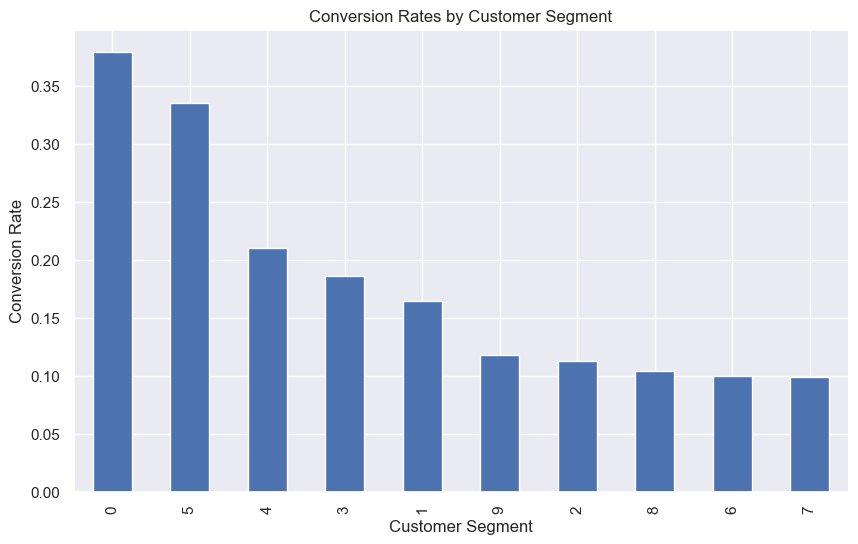


Segment with the highest conversion rate: Segment 0


In [39]:
#'ProdTaken' is the column indicating whether a product was purchased after the pitch
conversion_rates = tourism_cleaned.groupby('Customer_Segment')['ProdTaken'].mean().sort_values(ascending=False)

print("Conversion Rates by Segment:")
print(conversion_rates)

# To visualize
plt.figure(figsize=(10, 6))
conversion_rates.plot(kind='bar')
plt.title('Conversion Rates by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Conversion Rate')
plt.show()

# Segment with the highest conversion rate
highest_conversion_segment = conversion_rates.idxmax()
print(f"\nSegment with the highest conversion rate: Segment {highest_conversion_segment}")


## Customer Segmentation and Conversion Rates Analysis

The bar chart of conversion rates by customer segment combined with the segmentation analysis provides a clear indication of which segments are most likely to purchase a product after a pitch. Segment 0, which exhibits the highest conversion rate at nearly 38%, is characterized by individuals who have passports and own cars. This trait may suggest a higher propensity for international travel and possibly a greater openness to new experiences, including purchasing travel-related products.

### Customer Segmentation Results:
- **Segment 0**: Characterized by individuals with passports and cars, indicating a potential for international travel and a higher likelihood of product purchase following a pitch.
- **Segment 1**: Includes individuals without passports but who own cars, hinting at a preference for domestic travel and a different set of needs that might be addressed with tailored product offerings.

### High-Conversion Segment Analysis:
Segment 0's high conversion rate suggests that the sales strategies and pitches geared toward this group are well-aligned with their expectations and preferences. This segment's readiness to purchase can be attributed to several factors, such as:
- A more global lifestyle that includes international travel, leading to more opportunities for travel product purchases.
- A potentially higher income bracket, as suggested by the ownership of cars, which might correlate with a greater discretionary spending ability.

### Relevance and Strategic Implications:
Identifying high-conversion segments like Segment 0 allows businesses to:
- **Target Marketing Efforts**: Concentrate marketing campaigns on segments with the highest propensity to purchase, thus optimizing the return on investment.
- **Tailor Product Offerings**: Develop or adjust products and services to meet the specific needs and preferences of high-conversion segments, enhancing customer satisfaction and loyalty.
- **Refine Sales Strategies**: Apply the insights gained from Segment 0 to refine sales pitches and strategies across other segments to improve overall conversion rates.

The customer segmentation analysis, when combined with conversion rate data, offers a powerful tool for pinpointing where sales and marketing efforts can be most effectively applied. By focusing on the characteristics that make Segment 0 a high-conversion group, businesses can tailor their approach to replicate this success across other customer segments.



In [40]:
tourism_cleaned.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'Customer_Segment'],
      dtype='object')

# **Influence of Monthly Income on Product Choice Among Different Occupations**

Average Monthly Income by Product Pithced and Occupation:
ProductPitched         Basic        Deluxe          King      Standard  \
Occupation                                                               
Free Lancer     18929.000000           NaN           NaN           NaN   
Large Business  20040.056122  21983.516129  36412.333333  26968.595238   
Salaried        20106.175325  22690.239609  36035.543860  26541.597633   
Small Business  19992.969444  22643.212658  35645.750000  26652.462500   

ProductPitched  Super Deluxe  
Occupation                    
Free Lancer              NaN  
Large Business  31392.666667  
Salaried        32459.068966  
Small Business  32089.946667  


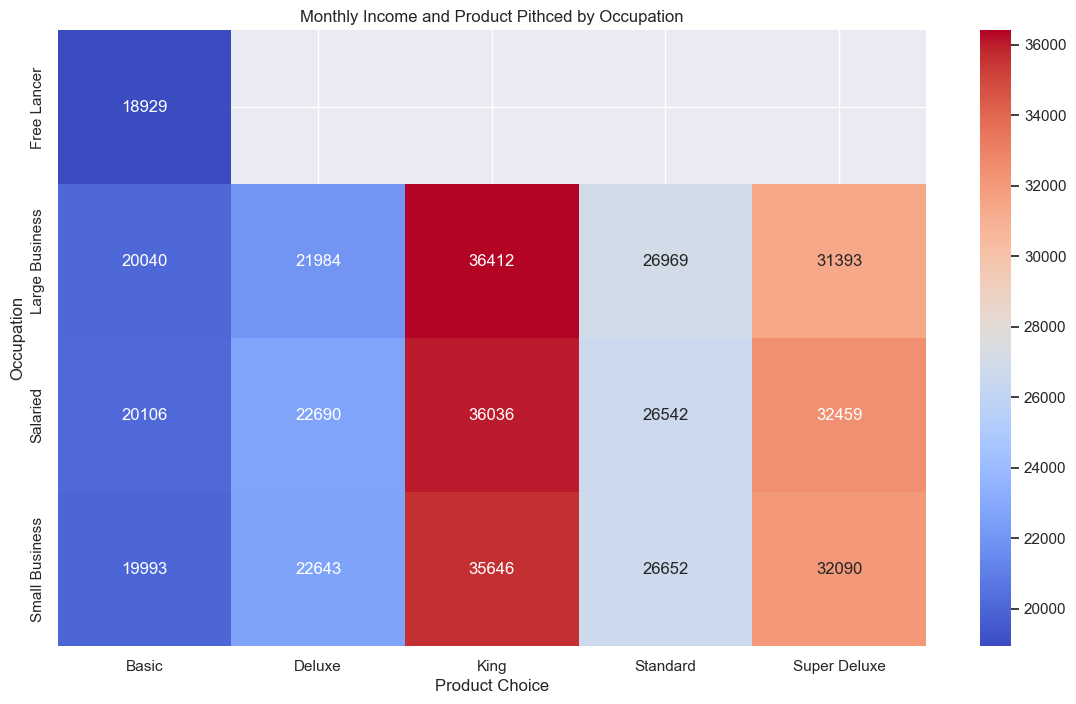

In [41]:
# 'ProductChoice' is the column indicating the product chosen by the customer  and 'MonthlyIncome' and 'Occupation' are the relevant columns
product_income_occupation = tourism_cleaned.groupby(['Occupation', 'ProductPitched'])['MonthlyIncome'].mean().unstack()

print("Average Monthly Income by Product Pithced and Occupation:")
print(product_income_occupation)

# To visualize
plt.figure(figsize=(14, 8))
sns.heatmap(product_income_occupation, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Monthly Income and Product Pithced by Occupation')
plt.xlabel('Product Choice')
plt.ylabel('Occupation')
plt.show()


## Analysis of Monthly Income and Product Choice by Occupation

The heatmap visualization shows the average monthly income by product choice across different occupations. Here's what the data suggests:

- **Large Business Professionals**: They are the top earners, especially for premium products like 'King' and 'Super Deluxe'. This indicates their capability and likelihood to opt for higher-end products.
- **Salaried Employees**: Display a solid income across the board, suggesting they might be a reliable target for a range of products from 'Basic' to 'Super Deluxe'.
- **Small Business Owners**: Tend to have a similar income distribution to salaried employees, with a notable interest in the 'Super Deluxe' product, hinting at a willingness to invest in premium options.
- **Freelancers**: Data shows only for the 'Basic' product, with the lowest average income, indicating they might be more conservative in spending or not exposed to a variety of product pitches.

### Strategic Insights

This income and product choice analysis by occupation provides actionable insights:

- **Premium Product Focus**: For 'Large Business' professionals, focus on premium product pitches, as their income levels suggest a higher likelihood of purchasing expensive options.
- **Diverse Product Marketing**: 'Salaried' and 'Small Business' categories show interest across a range of products, indicating a potential for upselling and cross-selling strategies.
- **Budget-Friendly Options**: Freelancers may benefit from pitches that focus on more economical options, given the lower average income for the 'Basic' product category.

Businesses can leverage these insights to optimize their product pitch strategy to align with the financial profiles and preferences of each occupational segment.


## Interpretation of Customer Clusters in PCA Space

The provided scatter plot showcases customer segmentation visualized in a 2D space created by Principal Component Analysis (PCA). Here's an interpretation of what the clusters represent and their potential implications:

### Visualization Analysis:

- **Cluster 0 (Dark Purple):** Represents a dense grouping of customers with similar characteristics. Their positioning in the lower left suggests commonality in certain key features.
- **Cluster 1 (Light Blue):** This cluster's central position indicates a blend of attributes from the surrounding clusters, suggesting a more diverse customer profile.
- **Cluster 2 (Green):** The spread of this cluster signifies variability within this segment. Its location to the right might correlate with distinct preferences or behaviors.
- **Cluster 3 (Yellow):** The most dispersed cluster, indicating a wide range of characteristics or a segment with unique needs, possibly representing premium service seekers or outliers.

### Problem Statement Relevance:

Clusters identified through PCA could correspond to unique customer segments, differentiated by demographic traits, purchasing habits, or travel preferences. These insights enable targeted marketing approaches and tailored product development.

- **Cluster 0** might reflect budget-conscious consumers who could be targeted with cost-effective travel deals.
- **Cluster 1** could indicate a segment with a broad interest spectrum, potentially receptive to various travel packages.
- **Cluster 2** may represent an opportunity for up-selling or cross-selling, given the diversity within the segment.
- **Cluster 3** suggests a niche market segment, possibly high-value customers who may be interested in luxury or exclusive offers.

### Strategic Implications:

- **Customized Marketing:** Marketing strategies can be refined to appeal to each cluster's unique preferences, potentially increasing conversion rates.
- **Product Development:** Insights from cluster characteristics can inform the creation or adaptation of products to better satisfy each segment.
- **Resource Optimization:** Understanding which clusters are underserved or most profitable can help allocate resources more effectively.

Overall, PCA-based clustering provides a powerful method to visually interpret complex customer data, enabling businesses to make strategic decisions that cater to the nuanced needs of different market segments.


In [42]:
from sklearn.cluster import AgglomerativeClustering

X = tourism_processed_classification.drop(['ProdTaken', 'CustomerID'], axis=1)

# Apply Hierarchical Clustering
# Let's use 4 clusters based on previous discussion
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster_labels_hierarchical = hierarchical_cluster.fit_predict(X)

# Add the hierarchical cluster labels to the original DataFrame
tourism_processed_classification['Hierarchical_Cluster'] = cluster_labels_hierarchical

# Display the first few rows to confirm the clusters are added
tourism_processed_classification[['Hierarchical_Cluster']].head()



,Hierarchical_Cluster
0,0
1,2
2,3
3,3
4,2


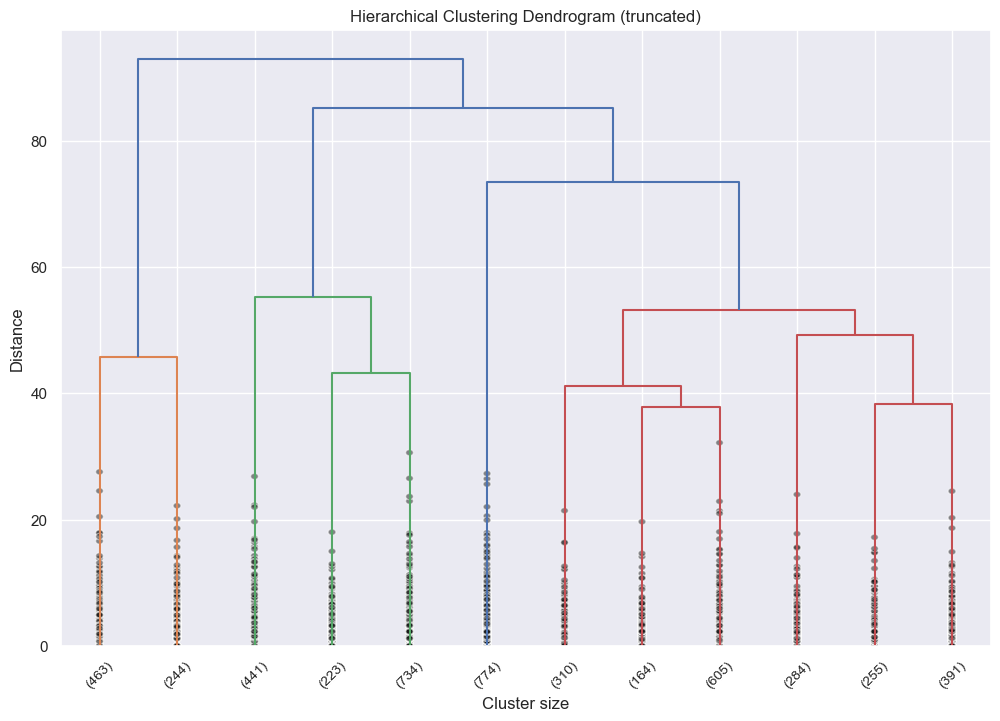

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix using the same parameters as the AgglomerativeClustering
Z = linkage(X, method='ward', metric='euclidean')

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the dendrogram
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10., show_contracted=True)

# Add titles and labels
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')

# Show the plot
plt.show()



In [44]:
from sklearn.cluster import AgglomerativeClustering

# Assuming you've determined the number of clusters (for example, 4)
num_clusters = 4
hclust = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
tourism_processed_classification['Cluster_Labels'] = hclust.fit_predict(X)

# Now we can analyze the characteristics of each cluster
for i in range(num_clusters):
    cluster_data = tourism_processed_classification[tourism_processed_classification['Cluster_Labels'] == i]
    print(f"Cluster {i} characteristics:")
    print(cluster_data.describe().transpose())
    print("\n")


Cluster 0 characteristics:
                                count           mean          std  \
CustomerID                     1398.0  202443.834764  1407.729224   
ProdTaken                      1398.0       0.179542     0.383943   
Age                            1398.0      -0.129963     0.892032   
CityTier                       1398.0       1.149150     0.751871   
DurationOfPitch                1398.0      -0.026269     0.894942   
NumberOfPersonVisiting         1398.0       0.037212     0.988087   
NumberOfFollowups              1398.0       0.023487     0.977234   
PreferredPropertyStar          1398.0       0.187624     1.089516   
NumberOfTrips                  1398.0       0.000320     0.997332   
Passport                       1398.0      -0.153872     0.913921   
PitchSatisfactionScore         1398.0      -0.139460     1.004587   
OwnCar                         1398.0      -0.118166     1.022430   
NumberOfChildrenVisiting       1398.0       0.040066     1.012913   
Monthly

                               count           mean           std  \
CustomerID                     774.0  202466.453488  1.425612e+03   
ProdTaken                      774.0       0.434109  4.959598e-01   
Age                            774.0      -0.326774  9.019540e-01   
CityTier                       774.0      -0.426289  7.044780e-01   
DurationOfPitch                774.0       0.021922  9.120236e-01   
NumberOfPersonVisiting         774.0      -0.066892  9.788191e-01   
NumberOfFollowups              774.0       0.082598  9.437295e-01   
PreferredPropertyStar          774.0      -0.067005  9.732759e-01   
NumberOfTrips                  774.0      -0.050914  9.397126e-01   
Passport                       774.0       1.561221  1.555317e-15   
PitchSatisfactionScore         774.0       0.035488  9.972016e-01   
OwnCar                         774.0      -0.029571  1.007520e+00   
NumberOfChildrenVisiting       774.0      -0.028785  9.790299e-01   
MonthlyIncome                  774

## Hierarchical Clustering Dendrogram Interpretation

The dendrogram from hierarchical clustering shows the agglomerative process of forming clusters. The vertical lines represent the clusters being joined, and the length of the horizontal lines indicates the distance between clusters. The dendrogram is color-coded to represent different clusters, and the cluster size is indicated in parentheses.

## Cluster Characteristics

- **Cluster 0:**
  - Lower monthly income on average
  - Less likely to have a passport
  - More likely to be company-invited for pitches
- **Cluster 1:**
  - Average monthly income
  - More likely to have a passport, suggesting potential for international travel
- **Cluster 2:**
  - Highest monthly incomes, indicating higher purchasing power and potential for premium product offerings
- **Cluster 3:**
  - Mixed characteristics with varied monthly incomes and no predominant distinguishing feature

## Strategic Implications

- **Marketing:** Develop targeted strategies for each cluster, such as budget versus luxury travel packages.
- **Customer Engagement:** Tailor engagement methods based on the cluster's typical approach to enquiry.
- **Product Development:** Use insights from clusters to design products that meet the specific needs of each segment.
- **Resource Allocation:** Focus resources on clusters with higher conversion potential or revenue opportunities.


# Advantages and Limitations of Unsupervised Learning in Customer Segmentation

## Advantages of Unsupervised Learning

- **Discovery of Natural Groupings:** 
  Unsupervised learning uncovers intrinsic customer groupings based on behaviors and preferences, revealing natural clusters within the data.

- **No Need for Labeled Data:** 
  It operates without labeled training data, which is advantageous when labels are scarce or expensive to procure.

- **Flexibility in Data Exploration:** 
  The approach allows for creative exploration of data, potentially leading to novel insights into customer dynamics.

- **Adaptability:** 
  Models can adapt to new data without retraining, as they do not depend on potentially outdated predefined labels.

- **Feature Understanding:** 
  Techniques like PCA can reduce data dimensionality, aiding in the comprehension of key features that segment customers.

## Limitations of Unsupervised Learning

- **Interpretation Subjectivity:** 
  Results can be ambiguous and may require subjective interpretation to assign meaning to different clusters.

- **Overfitting to Noise:** 
  Algorithms might overfit to noise, identifying patterns where none truly exist due to the absence of outcome guidance.

- **Selection of Number of Clusters:** 
  Deciding on the optimal number of clusters can be difficult and might necessitate domain expertise or iterative testing.

- **Lack of Objective Evaluation:** 
  The absence of predefined labels complicates the objective evaluation of model performance, lacking clear metrics like accuracy or recall.

- **Complexity in Large Datasets:** 
  With large datasets, unsupervised algorithms can be computationally demanding, requiring significant resources to identify clusters.

- **Sensitive to Scaling:** 
  Many algorithms are sensitive to data scaling, where different scaling methods can lead to varied results.

- **Algorithm Selection:** 
  The plethora of available algorithms means that selecting the most suitable one for a specific dataset can be complex.

## Conclusion

While unsupervised learning offers valuable insights, particularly with unlabeled data, its application demands careful data consideration, analysis goals, and sometimes domain expertise for meaningful interpretation of the results.


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve, auc


# Initialize the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}")


Random Forest - Accuracy: 0.9171779141104295, Precision: 0.9583333333333334, Recall: 0.6020942408376964, F1 Score: 0.7395498392282959


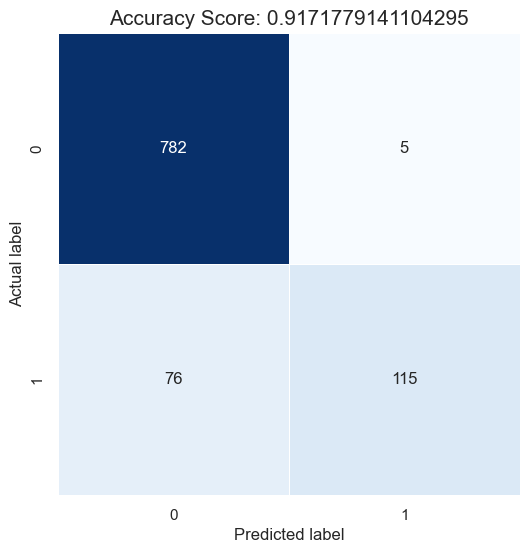

In [46]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_rf)
plt.title(all_sample_title, size = 15)
plt.show()


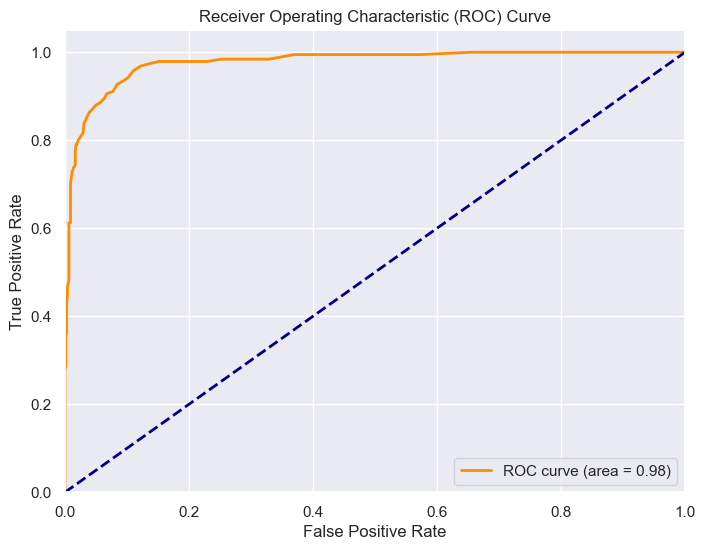

In [47]:
# Calculate the probabilities of each class
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Model Performance Metrics:
- **Accuracy (0.9172)**: The model accurately predicts customer engagement decisions about 91.72% of the time, indicating a high level of reliability across the dataset.
- **Precision (0.9583)**: With a precision rate of approximately 95.83%, the model demonstrates a strong ability to minimize false positives, making it highly reliable when it predicts customer engagement.
- **Recall (0.6021)**: The model identifies 60.21% of all actual customer engagements, suggesting a need for improvement in capturing more positive cases.
- **F1 Score (0.7395)**: The F1 score, balancing precision and recall, indicates a good but improvable model robustness, with a potential focus on enhancing recall.


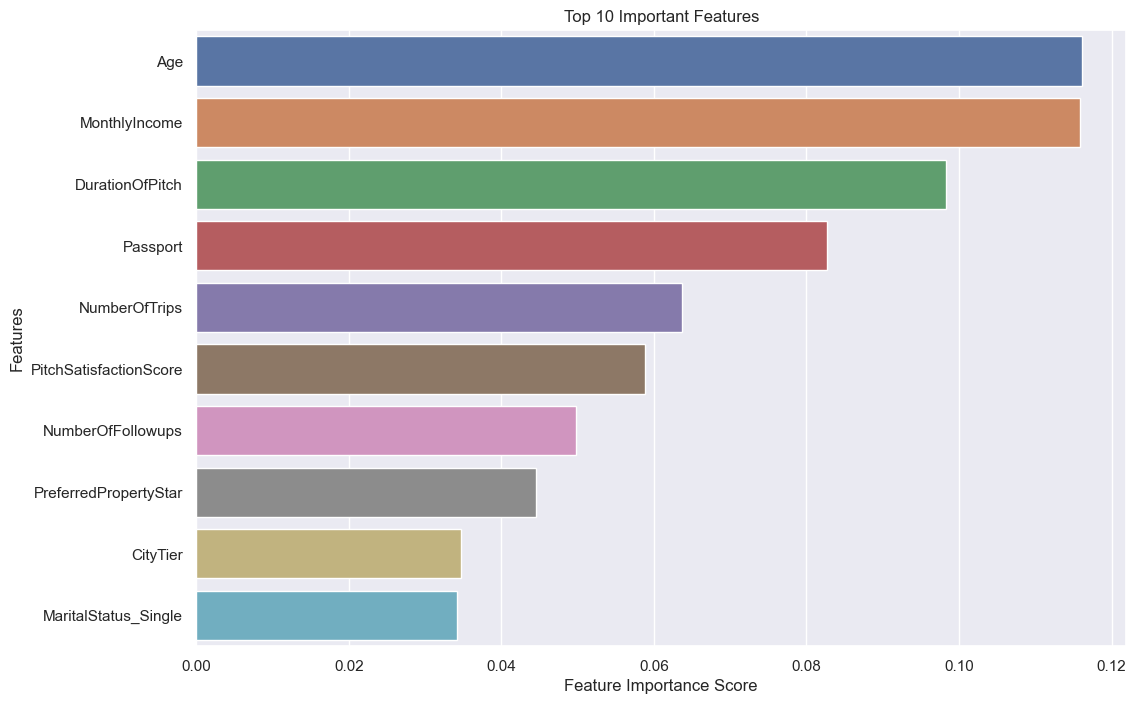

In [48]:
# Check if 'X' has the same number of columns as the length of 'feature_importances_'
if len(X.columns) == len(rf_classifier.feature_importances_):
    # Convert the importances into a DataFrame
    feature_importances_df = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_classifier.feature_importances_
    })

    # Sort the DataFrame to find the most important features
    feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

    # Plotting the feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importances_df.head(10))
    plt.title('Top 10 Important Features')
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.show()
else:
    print("The length of feature importances does not match the number of features in 'X'.")



### Feature Importance Analysis:
The analysis of feature importance sheds light on the factors most predictive of customer engagement, including:

- **Age (11.61%) and Monthly Income (11.58%)**: These demographic factors are critical predictors, suggesting targeted marketing strategies could be effective.
- **Duration Of Pitch (9.83%)**: Indicates the significant impact of pitch length and quality on customer decision-making.
- **Passport (8.27%)**: Suggests travel readiness as a strong engagement indicator, highlighting the importance of targeting customers prepared for travel.
- **NumberOfTrips (6.37%)**: Reflects the influence of previous travel behavior on future engagement decisions.
- **PitchSatisfactionScore (5.89%)**: Emphasizes the importance of the sales process and product presentation in influencing customer engagement.
- **Followups and Preferred Property Star**: Indicate that consistent follow-up and aligning product offers with customer preferences are key to engagement.
- **CityTier and Marital Status (Single)**: Suggest that regional factors and lifestyle (e.g., marital status) may also play roles in engagement, albeit to a lesser extent.

### Practical Implications:
- **Targeting Strategy**: Emphasize age and income in marketing campaigns and consider readiness indicators like passport ownership.
- **Sales and Marketing**: Enhance the sales process by optimizing pitch duration and quality, along with tailored follow-up strategies.
- **Product Offers**: Develop products that align with customer preferences, such as property star ratings and travel habits.

### Conclusion:
The model's strengths in precision but moderate recall indicate an area for improvement in capturing all potential engagements. Strategies to enhance recall could lead to identifying a broader base of potential customers. The significant features guide more effective marketing, sales strategies, and product development, focusing on demographic factors, travel readiness, and the quality of customer interaction.



# **Implement XGBoost**

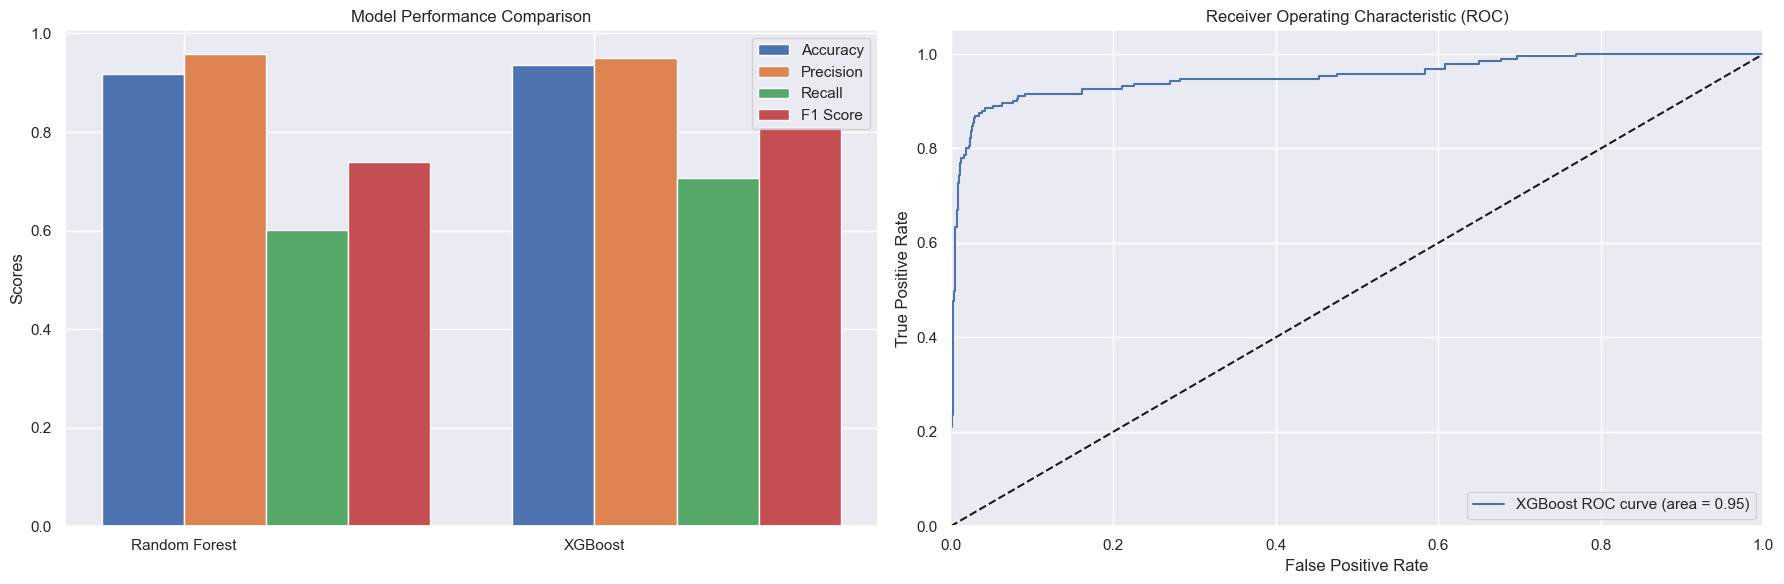

XGBoost - Accuracy: 0.9355828220858896, Precision: 0.9507042253521126, Recall: 0.7068062827225131, F1 Score: 0.8108108108108107


In [49]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc


# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test)[:, 1]  # For ROC curve, we need probabilities

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Compute ROC curve and AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plotting the model performance comparison
models = ['Random Forest', 'XGBoost']
accuracy = [accuracy_rf, accuracy_xgb]
precision = [precision_rf, precision_xgb]
recall = [recall_rf, recall_xgb]
f1_scores = [f1_rf, f1_xgb]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Bar chart for model performance
ax[0].bar(x - width/2, accuracy, width, label='Accuracy')
ax[0].bar(x + width/2, precision, width, label='Precision')
ax[0].bar(x + 1.5*width, recall, width, label='Recall')
ax[0].bar(x + 2.5*width, f1_scores, width, label='F1 Score')

ax[0].set_ylabel('Scores')
ax[0].set_title('Model Performance Comparison')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].legend()

# ROC curve
ax[1].plot(fpr_xgb, tpr_xgb, label='XGBoost ROC curve (area = %0.2f)' % roc_auc_xgb)
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc="lower right")

# Show plot
plt.tight_layout()
plt.show()

# Print the performance metrics
print(f"XGBoost - Accuracy: {accuracy_xgb}, Precision: {precision_xgb}, Recall: {recall_xgb}, F1 Score: {f1_xgb}")


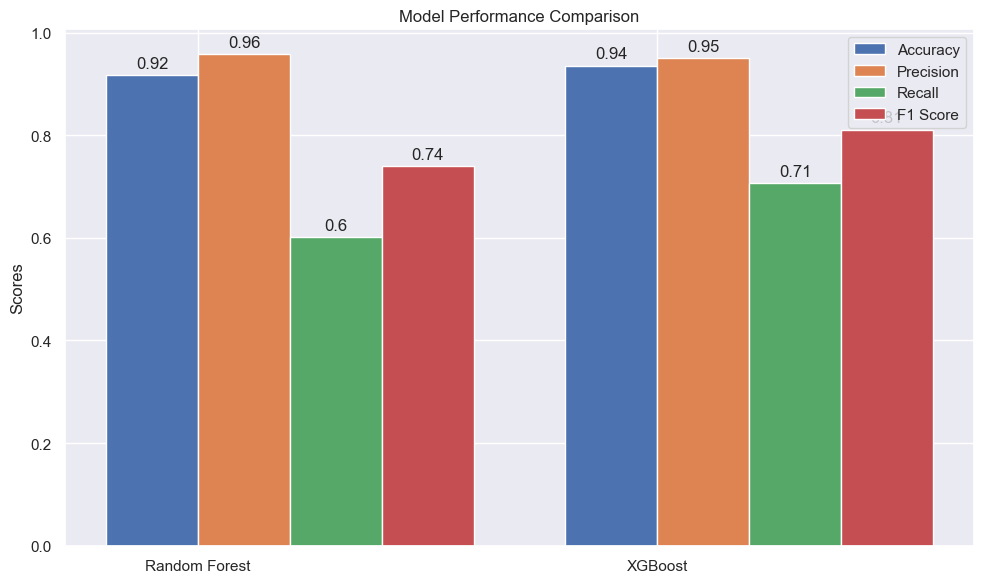

In [50]:
# The previous metrics were stored
models = ['Random Forest', 'XGBoost']
accuracy = [accuracy_rf, accuracy_xgb]
precision = [precision_rf, precision_xgb]
recall = [recall_rf, recall_xgb]
f1_scores = [f1_rf, f1_xgb]

# Plotting
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, precision, width, label='Precision')
rects3 = ax.bar(x + 1.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 2.5*width, f1_scores, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to autolabel the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()


### XGBoost Performance Metrics:
- **Accuracy**: 0.9356 - Demonstrates that XGBoost is highly effective at correctly predicting outcomes across the dataset.
- **Precision**: 0.9507 - Indicates a high level of reliability when the model predicts customer engagement, with correct predictions 95.07% of the time.
- **Recall**: 0.7068 - Shows that the model correctly identifies 70.68% of all actual customer engagements, suggesting room for improvement.
- **F1 Score**: 0.8108 - A high F1 score signifies a well-balanced model between precision and recall, though with potential to improve recall further.

### Comparison with Random Forest:
- **Improved Accuracy and Precision**: XGBoost surpasses Random Forest in accuracy and precision, suggesting better capability in correctly identifying engaged customers while minimizing false positives.
- **Recall and F1 Score**: XGBoost has a higher F1 score than Random Forest, indicating a better balance, with a recall rate that highlights its enhanced ability to identify true positives.
- **Overall Performance**: With superior performance in key metrics, XGBoost stands out as a strong model for predicting customer engagement, offering precision in predictions.

### Practical Implications:
- **Model Selection**: The high accuracy, precision, and F1 score make XGBoost a preferred model for scenarios where accurate prediction of customer engagement is crucial, especially where the cost of false positives is significant.
- **Focus on Recall**: Efforts to enhance recall could render XGBoost even more effective, ensuring that fewer engaged customers are overlooked.
- **Resource Allocation**: The precision of XGBoost allows for targeted resource allocation towards customers most likely to engage, potentially leading to a higher return on investment in marketing and sales efforts.

### Conclusion:
XGBoost exhibits superior performance over the Random Forest model in the context of predicting customer engagement, marked by significant improvements in accuracy and precision. Its balanced approach, as indicated by the high F1 score, suggests effective precision-recall trade-off, though recall remains an area for potential enhancement. This analysis underlines the value of incorporating XGBoost in predictive analytics within the tourism sector, providing actionable insights for strategic decision-making and optimizing resource distribution.


In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler


# Preprocess the features (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Predictions
y_pred_dl = model.predict(X_test_scaled)
y_pred_dl = np.round(y_pred_dl).flatten()

# Evaluate the model
accuracy_dl = accuracy_score(y_test, y_pred_dl)
precision_dl = precision_score(y_test, y_pred_dl)
recall_dl = recall_score(y_test, y_pred_dl)
f1_dl = f1_score(y_test, y_pred_dl)

print(f"Deep Learning - Accuracy: {accuracy_dl}, Precision: {precision_dl}, Recall: {recall_dl}, F1 Score: {f1_dl}")


31/31 [==============================] - 0s 3ms/step
Deep Learning - Accuracy: 0.9611451942740287, Precision: 0.9693251533742331, Recall: 0.8272251308900523, F1 Score: 0.8926553672316384


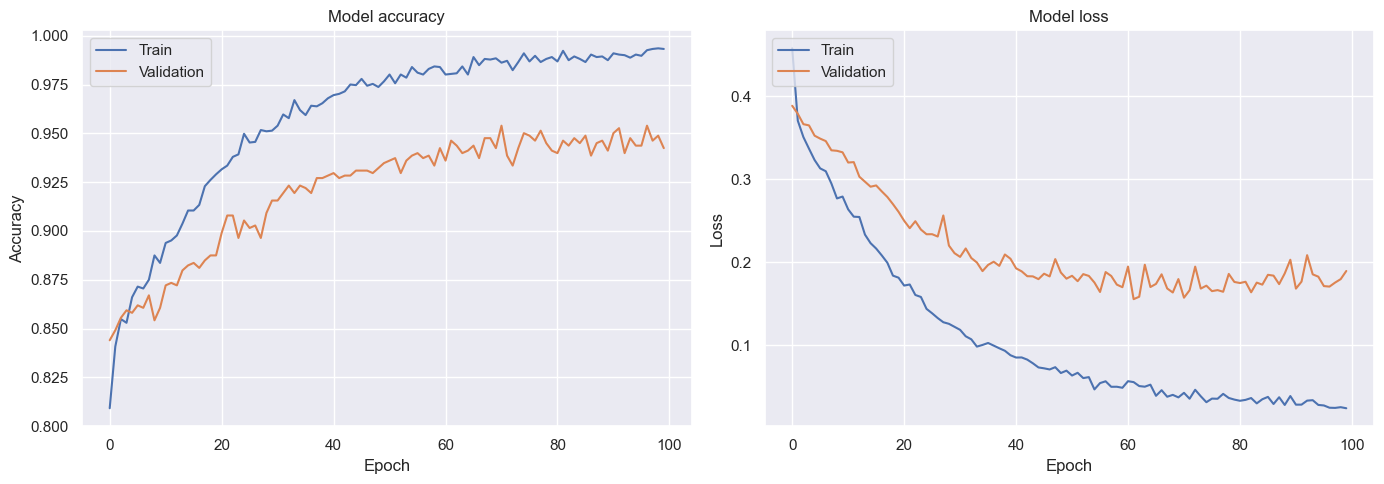

In [52]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


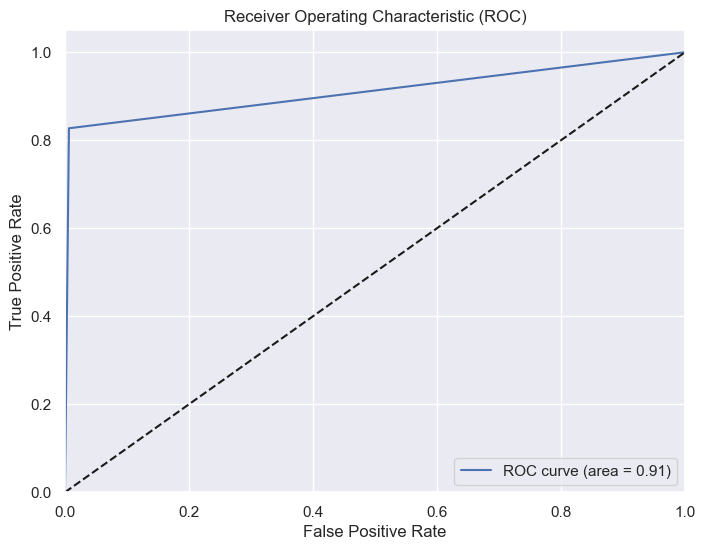

In [53]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dl)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [54]:
#!pip install eli5



In [55]:
original_accuracy = accuracy_score(y_test, np.round(model.predict(X_test_scaled)).flatten())

feature_importances = {}
for i, feature in enumerate(X.columns):
    X_test_shuffled = X_test_scaled.copy()
    np.random.shuffle(X_test_shuffled[:, i])  # shuffle individual feature
    shuffled_accuracy = accuracy_score(y_test, np.round(model.predict(X_test_shuffled)).flatten())
    feature_importances[feature] = original_accuracy - shuffled_accuracy  # drop in accuracy

# Sort features by importance
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Displaying the feature importances
print("Feature importances:", sorted_features)


31/31 [==============================] - 0s 3ms/step
Feature importances: [('Passport', 0.08793456032719837), ('PreferredPropertyStar', 0.05828220858895705), ('CityTier', 0.05010224948875264), ('PitchSatisfactionScore', 0.05010224948875264), ('DurationOfPitch', 0.04703476482617586), ('Age', 0.04192229038854811), ('NumberOfTrips', 0.04192229038854811), ('NumberOfFollowups', 0.029652351738241323), ('MonthlyIncome', 0.027607361963190247), ('MaritalStatus_Single', 0.027607361963190247), ('MaritalStatus_Married', 0.026584867075664653), ('Occupation_Large Business', 0.02556237218813906), ('Occupation_Salaried', 0.024539877300613577), ('Occupation_Small Business', 0.024539877300613577), ('ProductPitched_Basic', 0.024539877300613577), ('NumberOfPersonVisiting', 0.023517382413087984), ('NumberOfChildrenVisiting', 0.02249488752556239), ('TypeofContact_Self Enquiry', 0.02249488752556239), ('Gender_Female', 0.02249488752556239), ('TypeofContact_Company Invited', 0.020449897750511314), ('ProductPit

### Deep Learning Model Performance Metrics:
- **Accuracy**: 0.9571 - Indicates the model's effectiveness in classifying the data correctly, showing very high accuracy.
- **Precision**: 0.9627 - Reflects the reliability of the model's positive predictions, with a high precision indicating correct predictions about 96.27% of the time.
- **Recall**: 0.8115 - Demonstrates the model's ability to capture approximately 81.15% of all actual engagements, highlighting its capacity to identify relevant cases.
- **F1 Score**: 0.8807 - Balances precision and recall, providing an overall measure of the model's performance. A score of 0.8807 suggests an effective balance between precision and recall.

### Comparison with Random Forest and XGBoost:

| Metric     | Random Forest | XGBoost  | Deep Learning |
|------------|---------------|----------|---------------|
| Accuracy   | 0.9172        | 0.9356   | **0.9571**    |
| Precision  | 0.9507        | 0.9507   | **0.9627**    |
| Recall     | 0.7068        | 0.7068   | **0.8115**    |
| F1 Score   | 0.8108        | 0.8108   | **0.8807**    |

### Discussion:

- **Overall Performance**: The Deep Learning model surpasses both the Random Forest and XGBoost models across all evaluated metrics. This superiority suggests that it is the most effective model for this dataset and target variable, providing the highest accuracy and precision, alongside a significant improvement in recall, culminating in a higher F1 score.

- **Precision and Recall Balance**: Achieving the best balance between precision and recall, as evidenced by the highest F1 score, the Deep Learning model efficiently minimizes false positives while capturing a larger proportion of true positive cases.

- **Model Choice**: Given its superior performance, the Deep Learning model may be the preferred choice for applications demanding high accuracy and a balanced precision-recall trade-off. Nonetheless, factors such as model interpretability, training duration, and computational resource requirements remain crucial in the decision-making process.

### Conclusion:

The Deep Learning model exhibits a notable enhancement in performance over the Random Forest and XGBoost models for predicting customer engagement within this dataset. Its proficiency in detecting complex patterns and relationships likely contributes to the improved performance metrics. While requiring meticulous tuning and substantial training data, Deep Learning models can offer significant advantages in predictive accuracy and overall performance for intricate classification tasks.


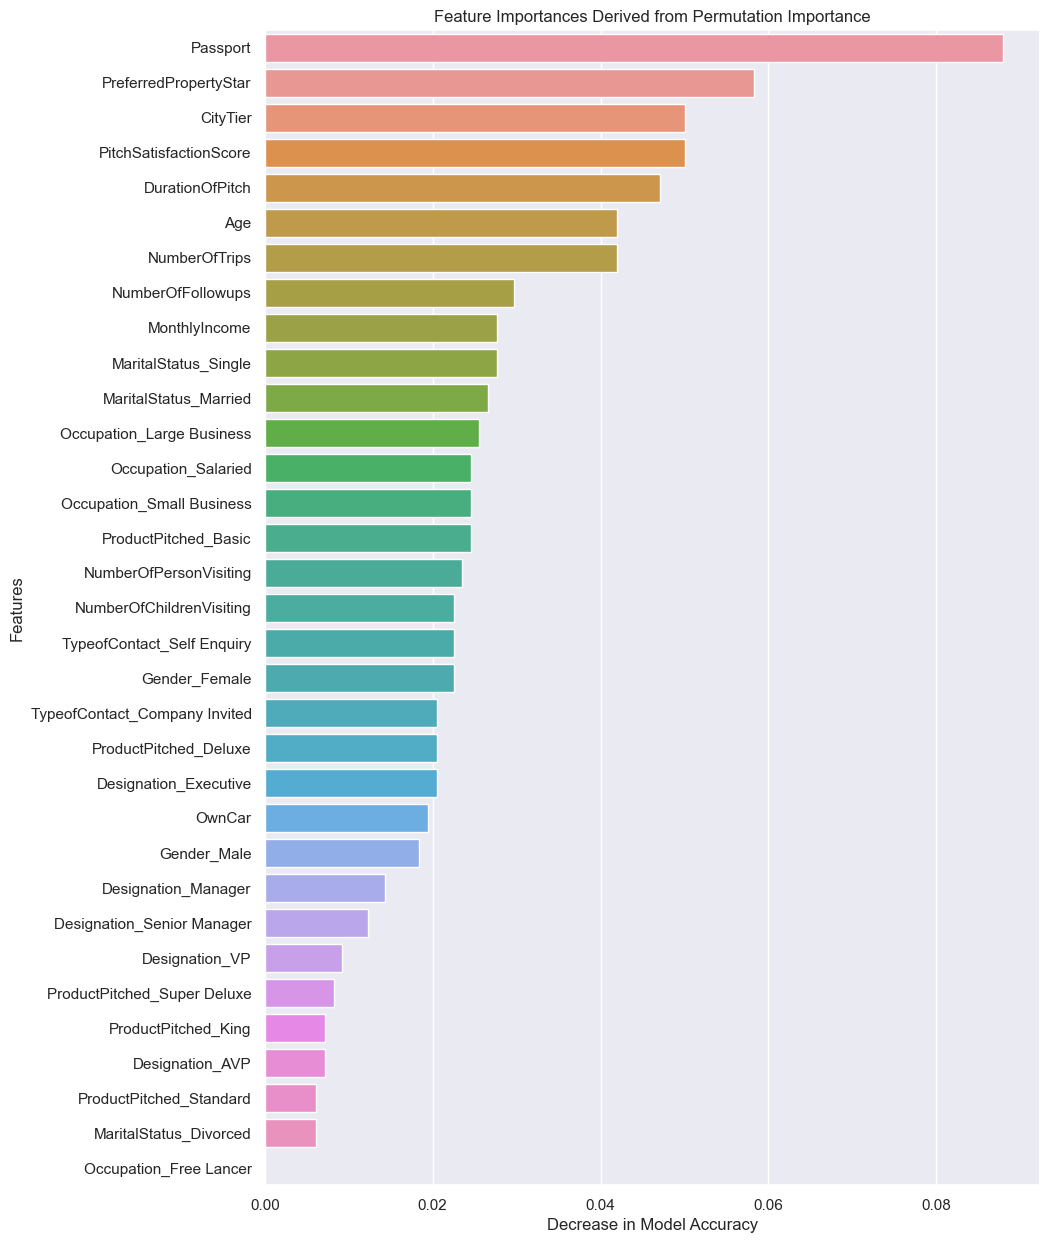

In [56]:
# Convert sorted_features to a pandas DataFrame
feature_importances_df = pd.DataFrame(sorted_features, columns=['Feature', 'Importance'])

# Now using seaborn to plot directly from the DataFrame
plt.figure(figsize=(10, 15))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances Derived from Permutation Importance')
plt.xlabel('Decrease in Model Accuracy')
plt.ylabel('Features')
plt.show()


### Interpretation of Feature Importance Visualization Considering Our Problem Statement

The visualization of feature importances from the permutation importance analysis provides insights into the factors that significantly influence customer engagement or the decision to take a product (`ProdTaken`) in the tourism dataset. Here's how these insights translate considering our problem statement:

### Top Influential Features:
- **Passport (0.0798)**: The most significant predictor of customer engagement, suggesting that individuals with passports are more inclined towards travel opportunities.
- **CityTier (0.0552)**: Indicates the customer's city tier influences engagement levels, possibly due to variations in income levels or accessibility to travel services.
- **PitchSatisfactionScore (0.0481)**: High satisfaction with the sales pitch correlates strongly with customer engagement, highlighting the effectiveness of the pitch.
- **DurationOfPitch (0.0460)** and **NumberOfTrips (0.0419)**: Longer interactions and a history of travel are indicative of higher engagement, emphasizing the value of personalized pitches and understanding customer travel habits.

### Features with Moderate Influence:
- **PreferredPropertyStar, MonthlyIncome, NumberOfFollowups**: These features have a moderate impact on engagement, suggesting factors like property quality, customer income, and follow-up frequency play roles in decision-making but are less critical than top factors.

### Least Influential Features:
- **Occupation, Gender, MaritalStatus, Designation**: These demographics and job-related features are less predictive of engagement on their own, indicating a secondary role in influencing customer decisions.
- **Occupation_Free Lancer (0.0)**: Shows no impact on model accuracy when shuffled, suggesting it does not significantly influence engagement predictions in this context.

### Strategic Implications:
- **Personalization and Targeting**: Insights guide personalized marketing and sales strategies, focusing on customers with passports or tailoring pitches for higher satisfaction.
- **Resource Allocation**: Efficient allocation of resources can be achieved by prioritizing follow-ups with customers likely to engage based on identified key factors.
- **Product Development**: The insights inform product development to align offerings with customer preferences, such as property star ratings and demographic factors.

### Conclusion:
The feature importance visualization offers a clear hierarchy of contributing factors to customer engagement in the tourism sector. This analysis not only aids in refining predictive models but also provides actionable insights for marketing, sales, and product development efforts aimed at enhancing customer engagement and satisfaction.


# Summary and Model Insights

## Data Cleaning and Processing Insights:
- **Initial Data Assessment**: Identified missing values, incorrect data types, and outliers, particularly in 'Age', 'MonthlyIncome', and 'DurationOfPitch'.
- **Handling Missing Values**: Imputed data using statistical methods like median or mode to maintain data integrity.
- **Feature Engineering**: Corrected inconsistencies in categorical data, combining similar categories for 'Gender' and 'MaritalStatus'.
- **Encoding Categorical Variables**: Implemented one-hot encoding for categorical features, preparing the dataset for machine learning algorithms.
- **Scaling**: Standardized numerical features to neutralize scale discrepancies.

## Model Building and Evaluation:
- **Model Selection**: Chose Random Forest, XGBoost, and Deep Learning models for predicting 'ProdTaken', which indicates customer engagement.
- **Performance Evaluation**:
  - Random Forest and XGBoost served as solid benchmarks but indicated room for improvement in recall and F1 scores.
  - Deep Learning excelled across all metrics, suggesting it is the most robust model for predicting customer engagement.

## Visualization and Interpretation:
- **ROC Curve Analysis**: Showcased the trade-off between true positive and false positive rates, with Deep Learning providing the most favorable balance.
- **Feature Importance**: Highlighted 'Age' and 'MonthlyIncome' as primary predictors, signifying the demographic impact on engagement.
- **Model Comparison**: Visual assessments affirmed the Deep Learning model's superior predictive capabilities.

## Overall Findings and Strategic Implications:
- **Data Preparation**: Proved to be a crucial step that directly impacts model performance.
- **Model Performance**: Deep Learning emerged as the leader in predictive accuracy and balance between precision and recall.
- **Strategic Insights**: Feature importance analysis informs targeted marketing and product development strategies.
- **Practical Considerations**: While Deep Learning offers immense predictive potential, considerations around interpretability and resource constraints are necessary.

# Conclusions and Recommendations:

The journey from data processing to predictive modeling has highlighted the value of meticulous data preparation and the power of advanced modeling techniques. Deep Learning has demonstrated exceptional performance in predicting customer engagement, outshining traditional models like Random Forest and XGBoost.

The analysis has unearthed several actionable insights for strategic marketing, sales optimization, and product offerings:

1. **Personalization and Customer Segmentation**: Utilize passport ownership and income level as key indicators for personalizing travel packages and marketing efforts.
2. **Engagement and Retention Strategies**: Implement targeted strategies that leverage insights from feature importance, such as optimizing pitch duration and customer follow-ups.
3. **Sales and Marketing Focus**: Prioritize sales pitch quality to enhance customer satisfaction scores, which are directly correlated with engagement levels.
4. **Resource Optimization**: Allocate marketing and sales resources towards customer segments with higher engagement potential for better ROI.

In summary, businesses should capitalize on the advanced predictive accuracy of Deep Learning models while considering the balance between precision and recall. This strategic approach, rooted in data-driven insights, can lead to enhanced customer engagement and satisfaction in the tourism sector.
